In [ ]:
!pip install pumpy pandas

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 3.8 MB/s eta 0:00:00
  Created wheel for pumpy: filename=pumpy-1.1.3-py3-none-any.whl size=5397 sha256=57a44f6f86c10aa58cee92b883d42b897382af4a90b0c2b4cd8bfd46eda2a06c
  Stored in directory: /root/.cache/pip/wheels/29/71/ba/bd8d6dc31ef72b12a767e519fcc0eda6c4a4dbcb515089e8d3
Successfully built pumpy


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
!pip install matplotlib seaborn plotly

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Palestine Body Count.csv')
df

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.0,DECEMBER,781,NaN,51,8
1,2000.0,NOVEMBER,3838,NaN,112,22
2,2000.0,OCTOBER,5984,NaN,104,10
3,2000.0,SEPTEMBER,NaN,NaN,16,1
4,2001.0,DECEMBER,304,NaN,67,36
...,...,...,...,...,...,...
246,2021.0,MARCH,NaN,NaN,4,0
247,2021.0,APRIL,NaN,NaN,1,0
248,2021.0,MAY,NaN,NaN,26,3
249,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.0,DECEMBER,781,NaN,51,8
1,2000.0,NOVEMBER,3838,NaN,112,22
2,2000.0,OCTOBER,5984,NaN,104,10
3,2000.0,SEPTEMBER,NaN,NaN,16,1
4,2001.0,DECEMBER,304,NaN,67,36


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    float64
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  196 non-null    object 
 3   Israelis Injuries      133 non-null    object 
 4   Palestinians Killed    250 non-null    object 
 5   Israelis Killed        250 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.9+ KB


In [ ]:
df.shape

(251, 6)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed'],
      dtype='object')

In [ ]:
df = df.fillna({
    'Palestinians Injuries': '0',
    'Israelis Injuries': '0',
    'Israelis Killed': '0'
})

In [ ]:
numerical_columns = ['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed' ]
df[numerical_columns] = df[numerical_columns].replace({',': ''}, regex=True)
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
df

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.0,DECEMBER,781.0,0.0,51.0,8
1,2000.0,NOVEMBER,3838.0,0.0,112.0,22
2,2000.0,OCTOBER,5984.0,0.0,104.0,10
3,2000.0,SEPTEMBER,0.0,0.0,16.0,1
4,2001.0,DECEMBER,304.0,0.0,67.0,36
...,...,...,...,...,...,...
246,2021.0,MARCH,0.0,0.0,4.0,0
247,2021.0,APRIL,0.0,0.0,1.0,0
248,2021.0,MAY,0.0,0.0,26.0,3
249,NaN,NaN,0.0,0.0,NaN,0


In [ ]:
df.describe()

,Year,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
count,249.000000,249.000000,249.000000,250.000000,251.000000
mean,2010.542169,895.381526,41.445783,80.000000,10.159363
std,6.014702,7187.086268,358.476500,642.966593,80.991990
min,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,60.000000,0.000000,4.000000,0.000000
50%,2011.000000,161.000000,3.000000,12.000000,1.000000
75%,2016.000000,303.000000,15.000000,37.000000,5.000000
max,2021.000000,111475.000000,5160.000000,10000.000000,1275.000000


In [ ]:
df.nunique()

,0
Year,22
Month,14
Palestinians Injuries,170
Israelis Injuries,54
Palestinians Killed,78
Israelis Killed,34


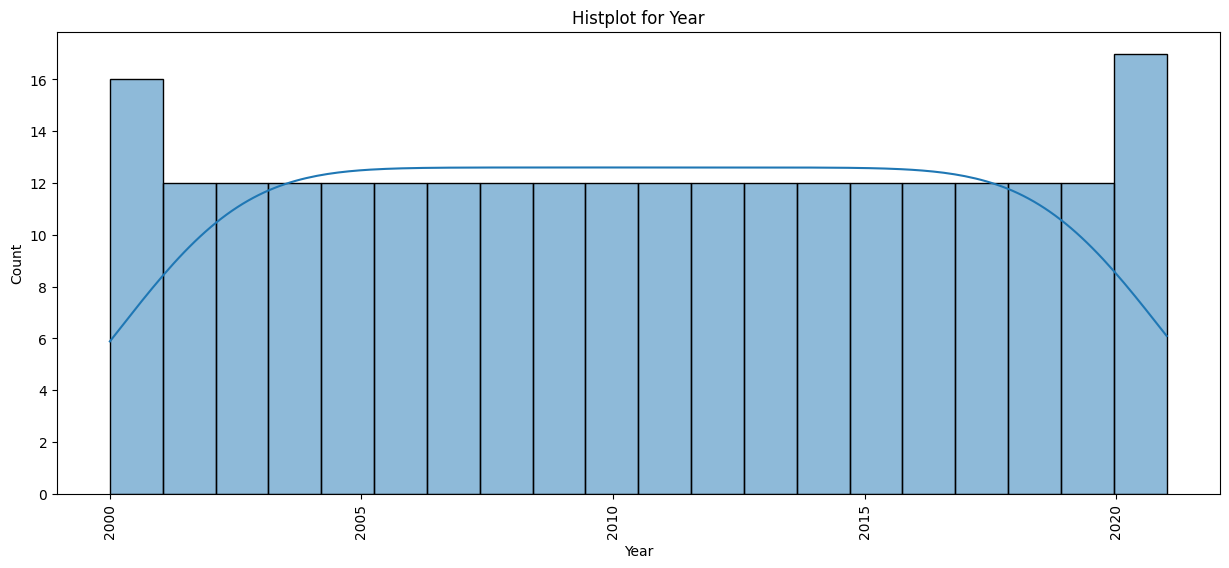

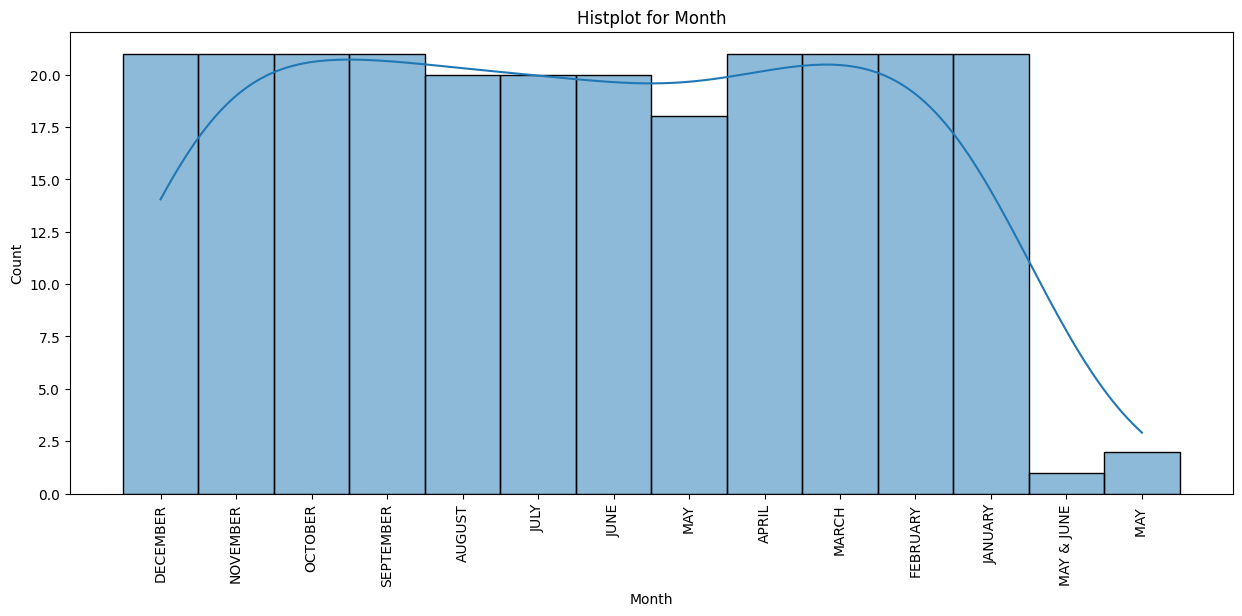

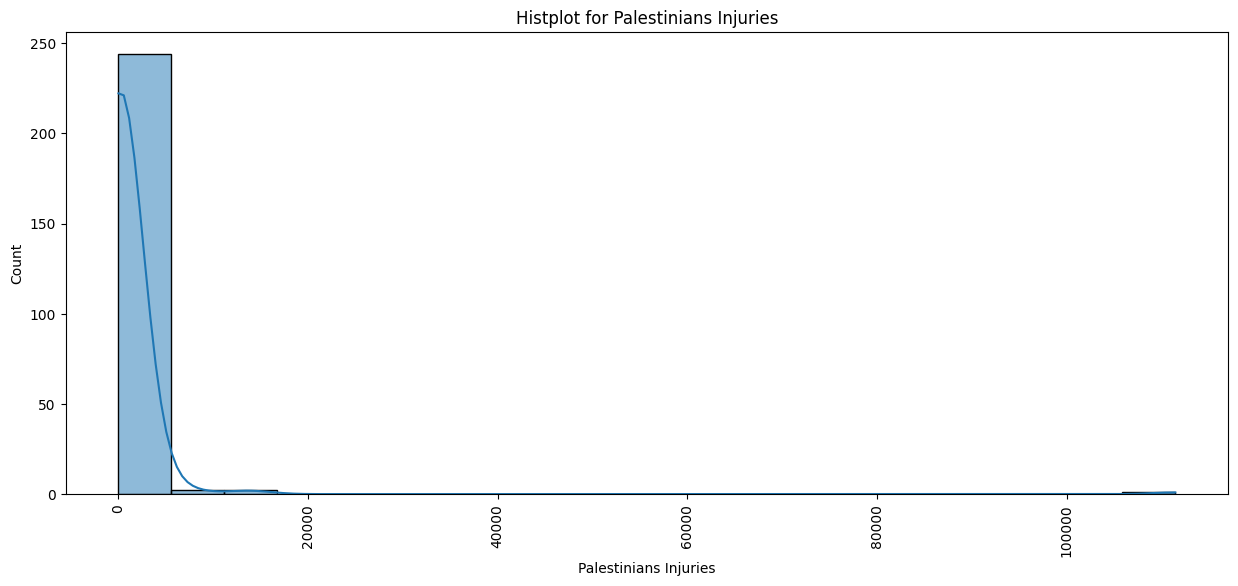

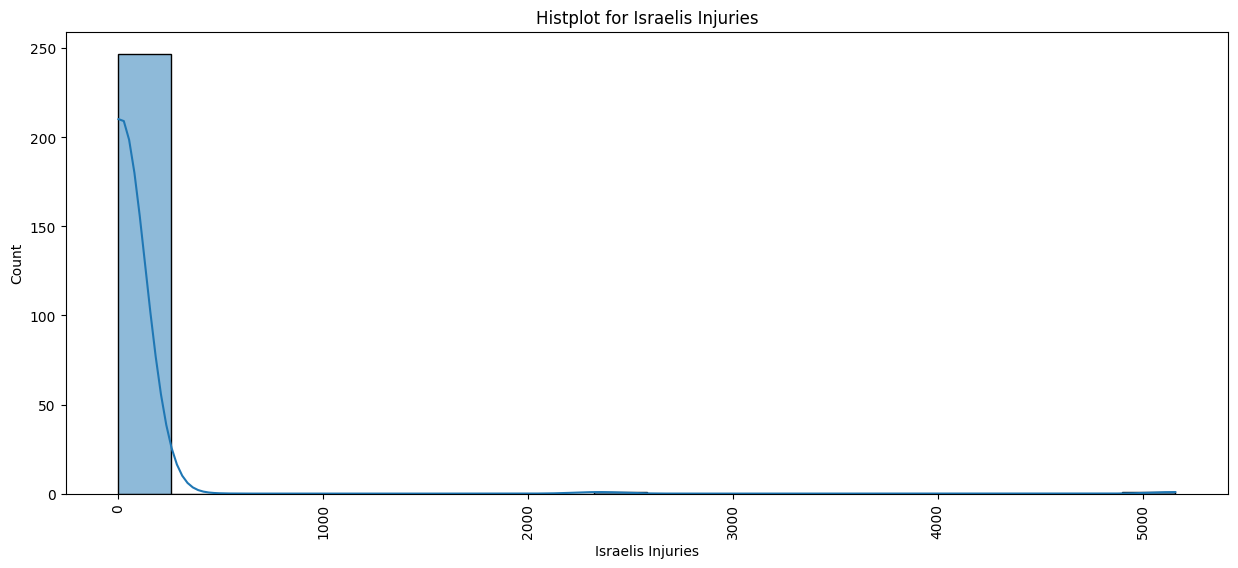

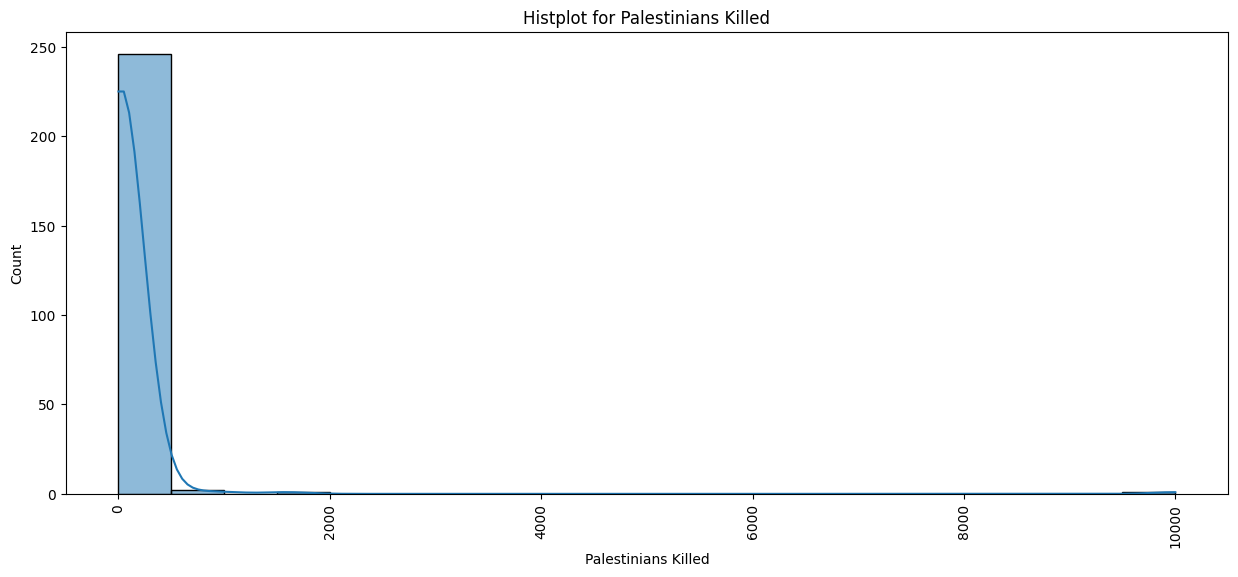

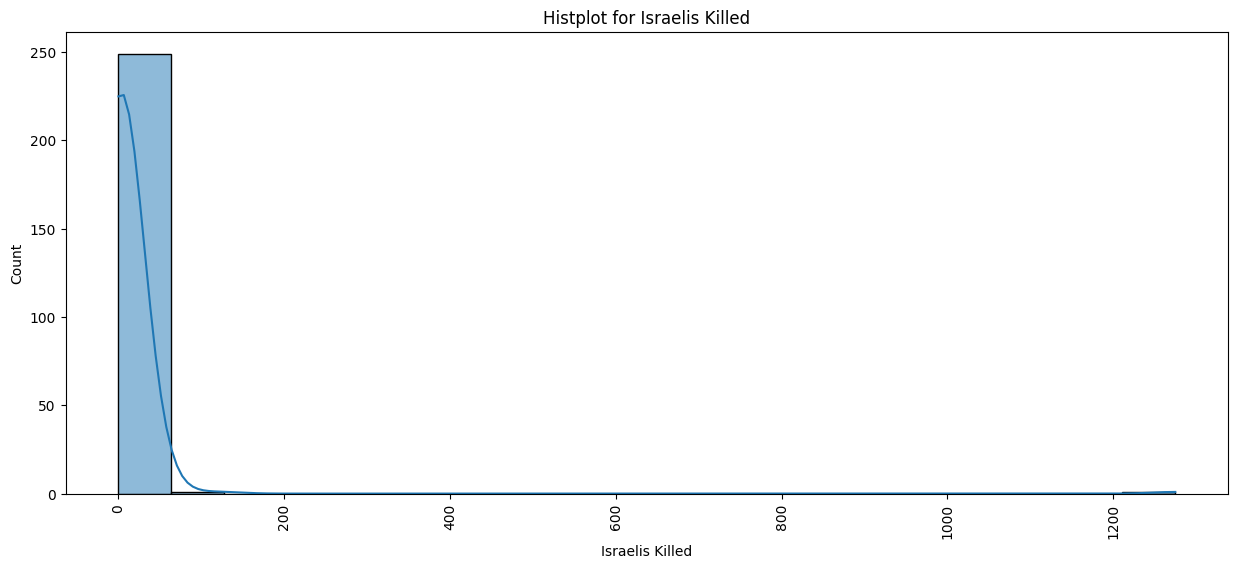

In [ ]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.title(f'Histplot for {i}')
    plt.show()

In [ ]:
df1 = df[['Year', 'Palestinians Injuries', 'Israelis Injuries','Palestinians Killed',
 'Israelis Killed']]

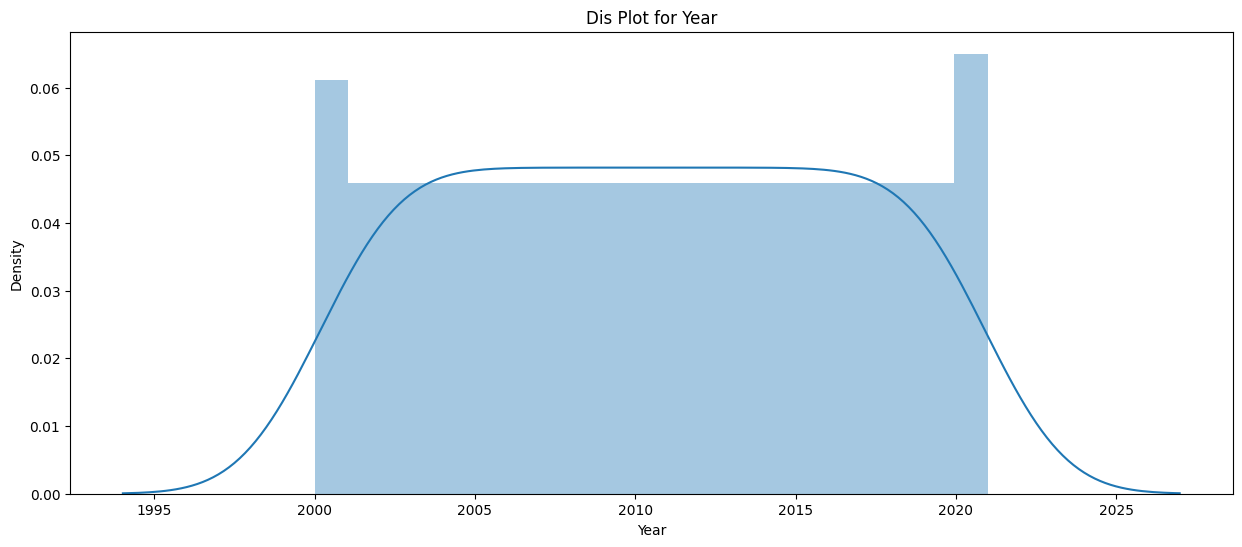

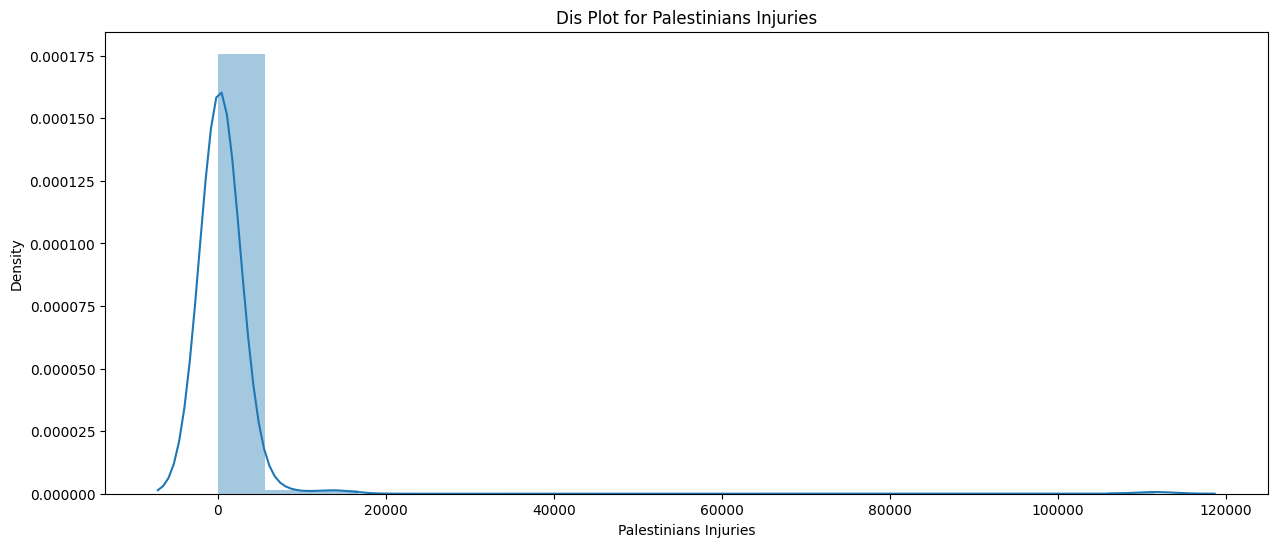

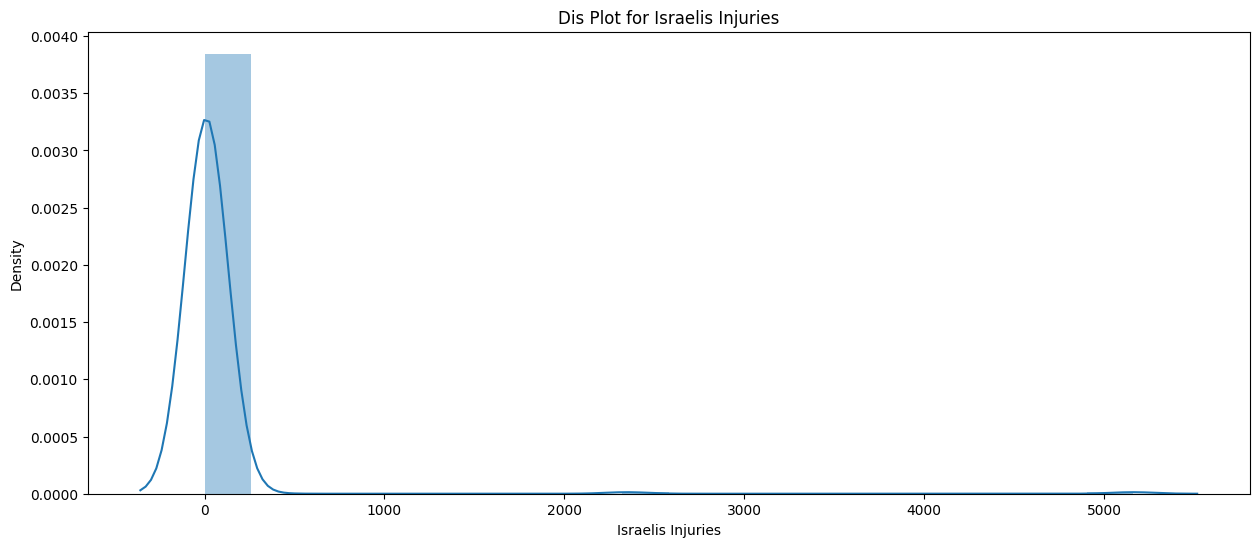

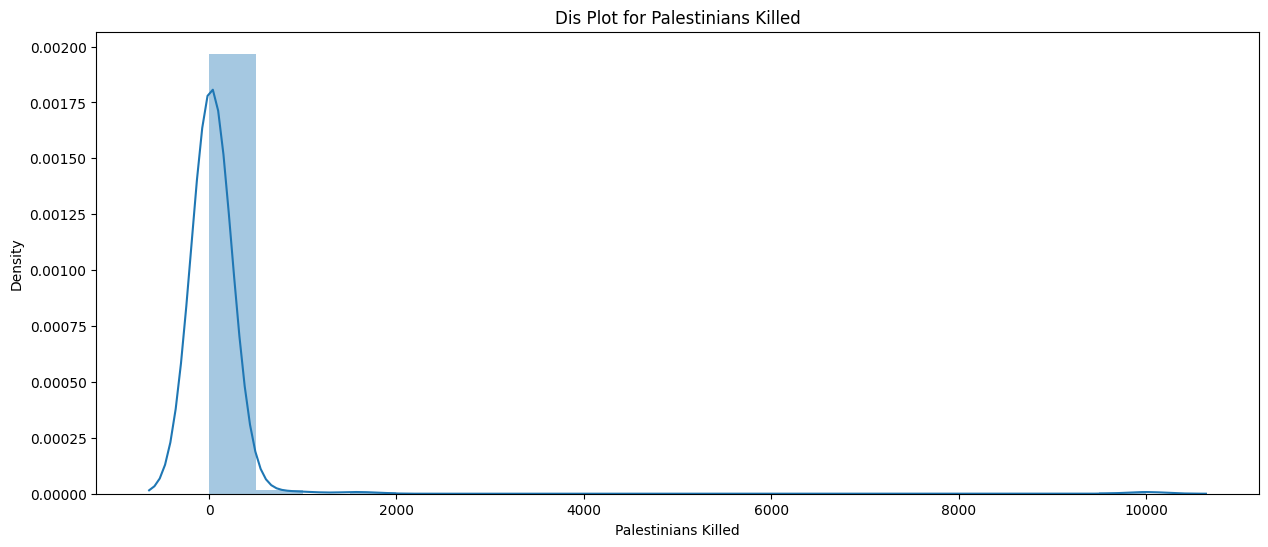

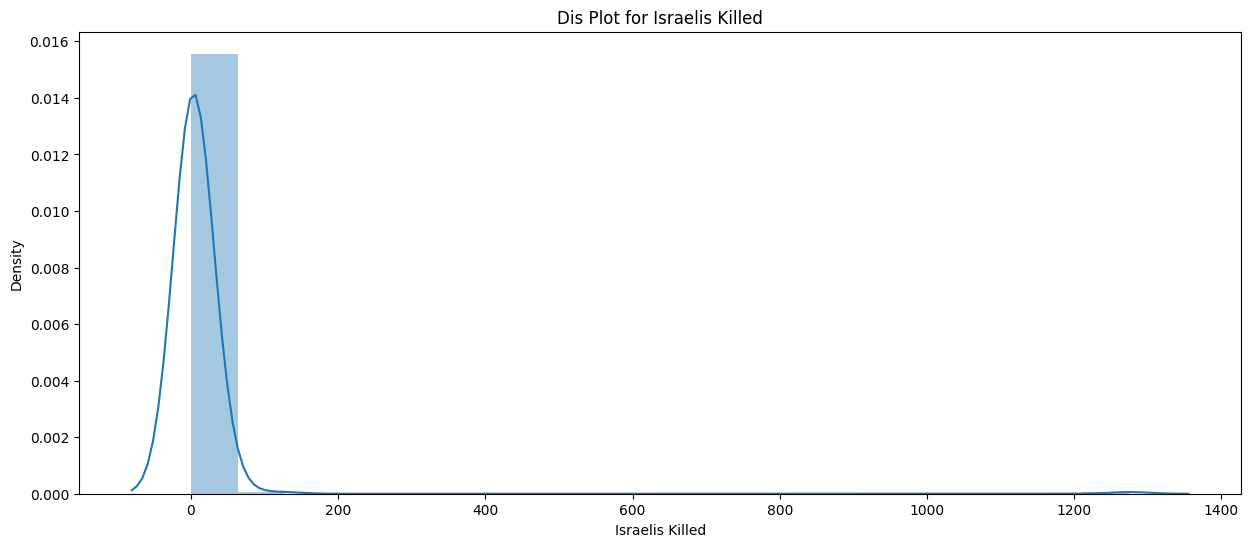

In [ ]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df1[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.title(f'Dis Plot for {i}')
    plt.show()

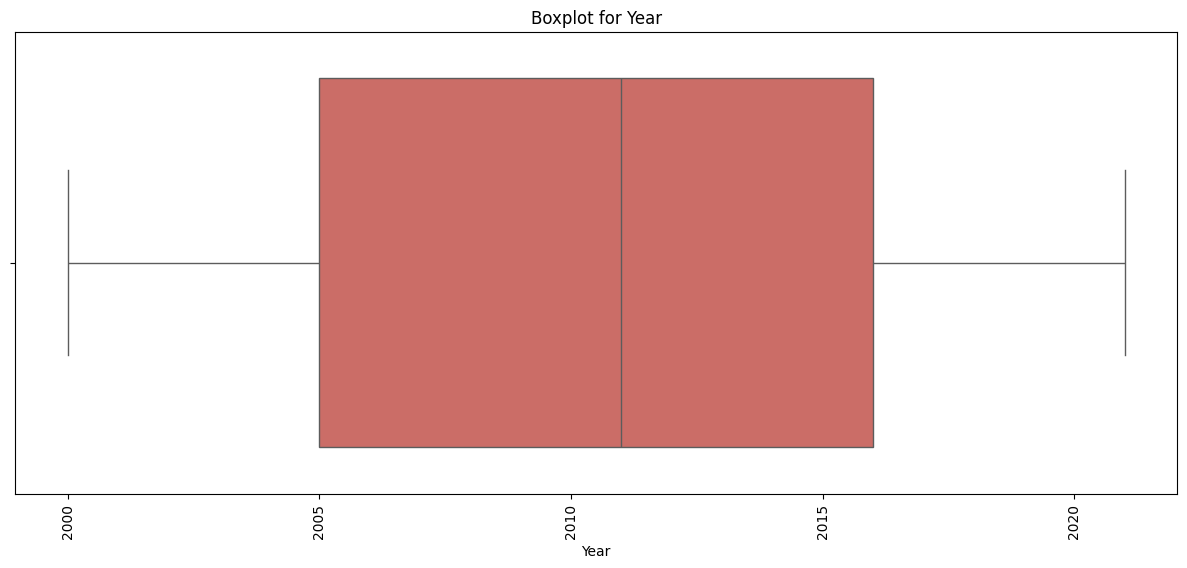

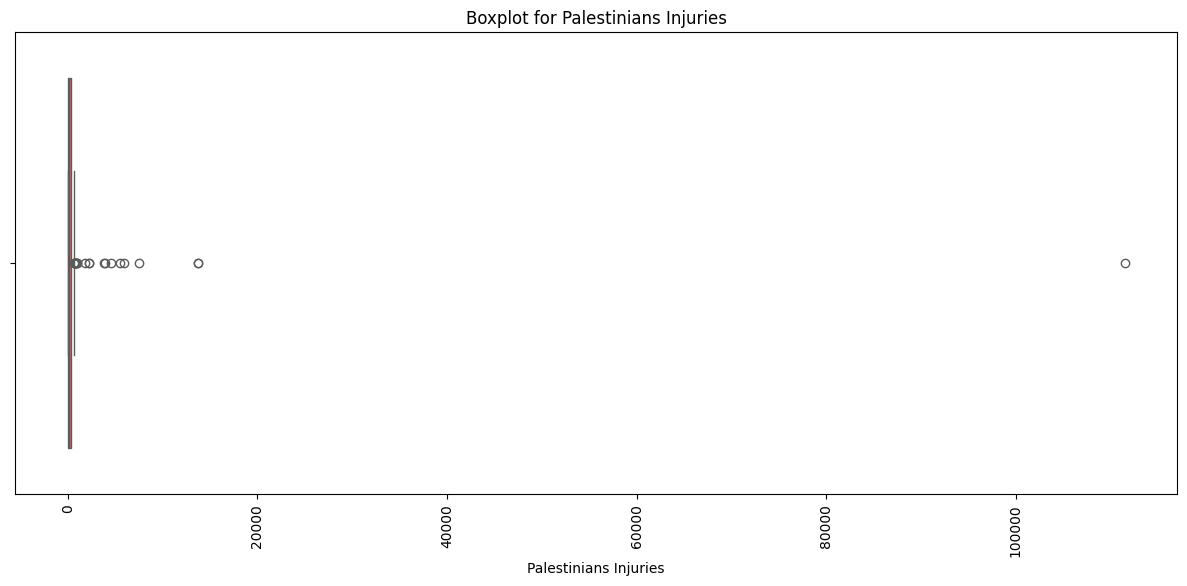

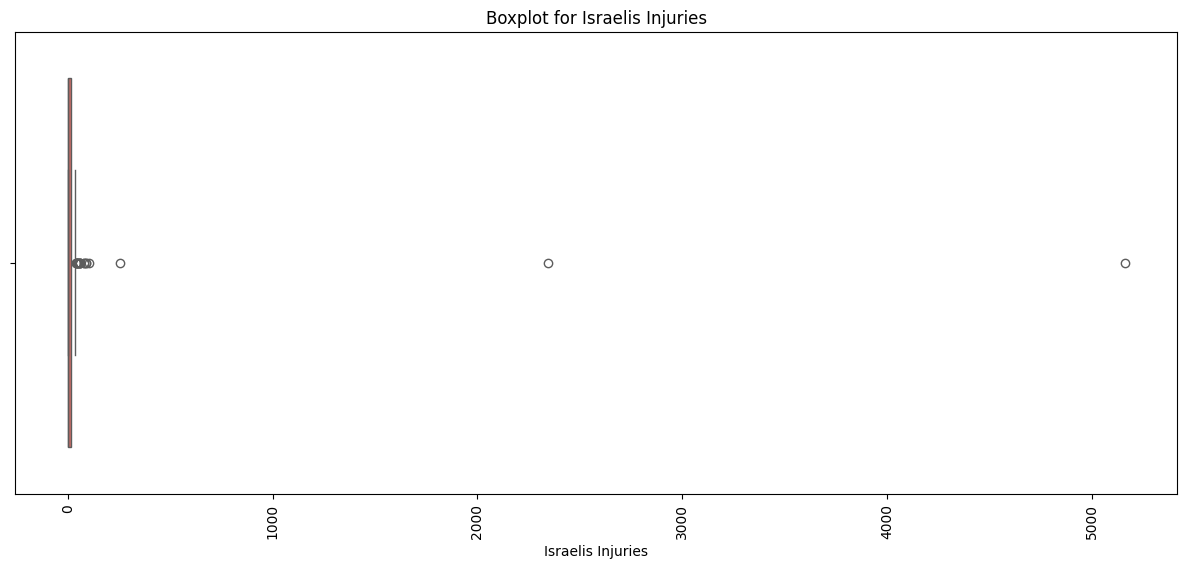

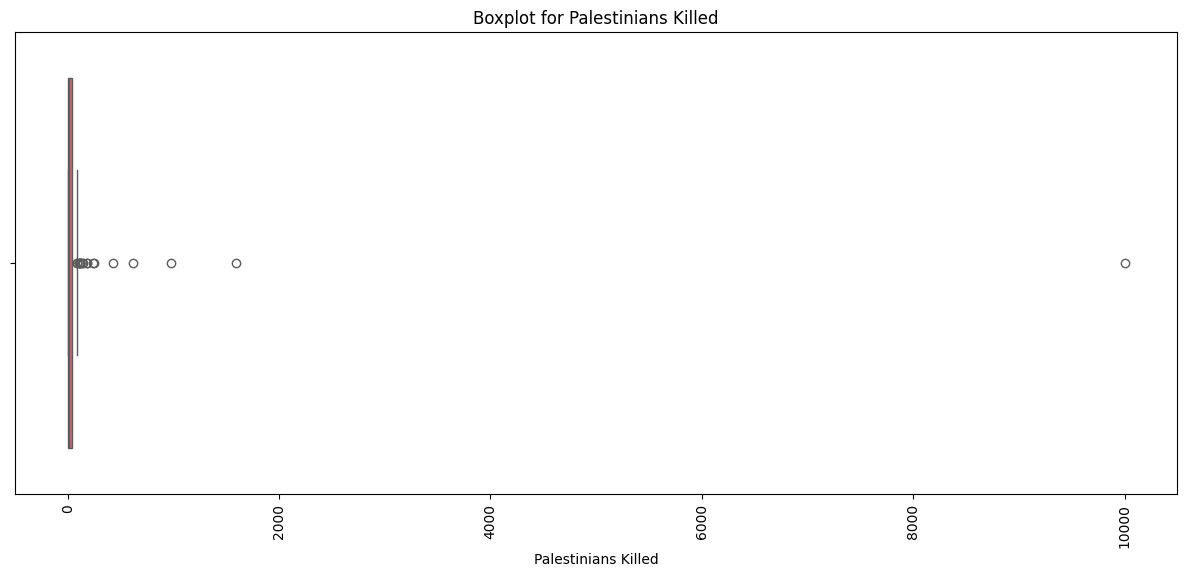

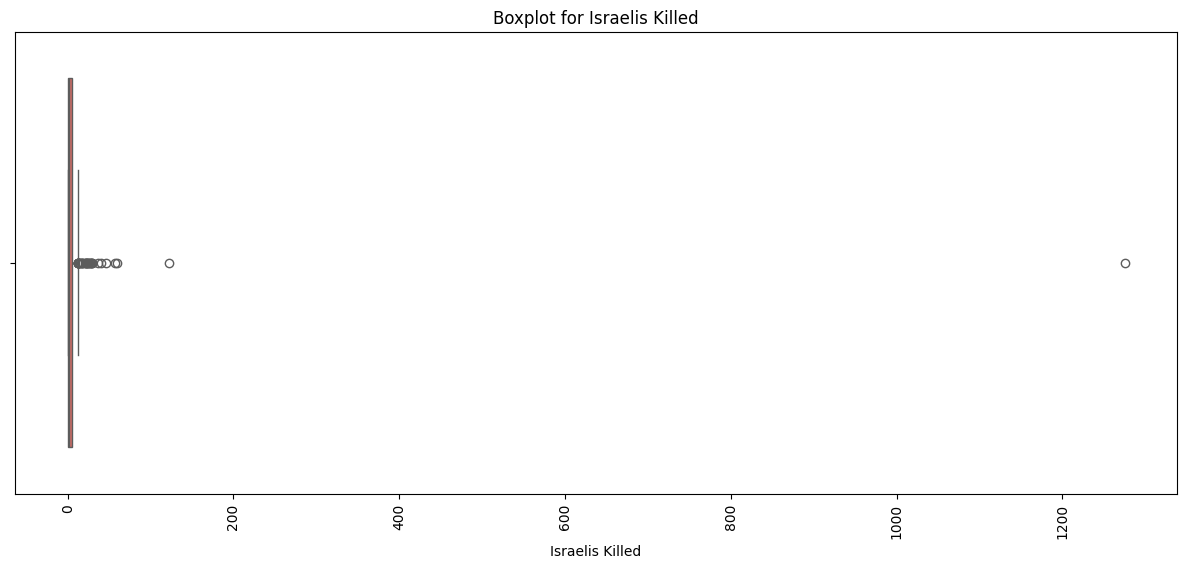

In [ ]:
for i in df1.columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=df1[i], data=df1, palette='hls')
    plt.xticks(rotation=90)
    plt.title(f'Boxplot for {i}')
    plt.show()

In [ ]:

for i in df.columns:
    fig = go.Figure(data=[go.Histogram(x=df[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

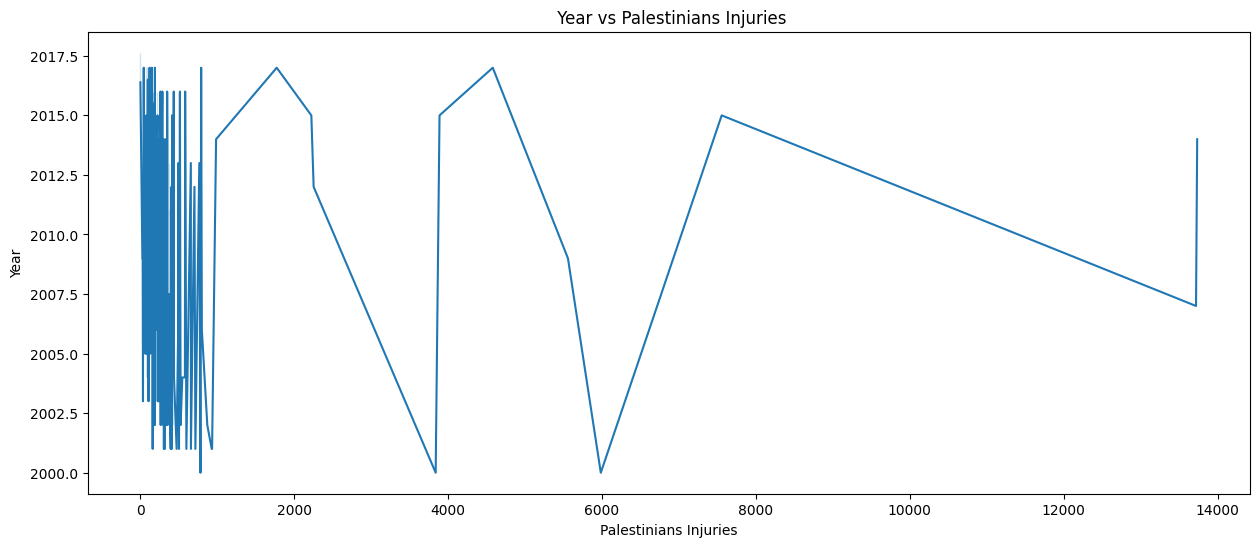

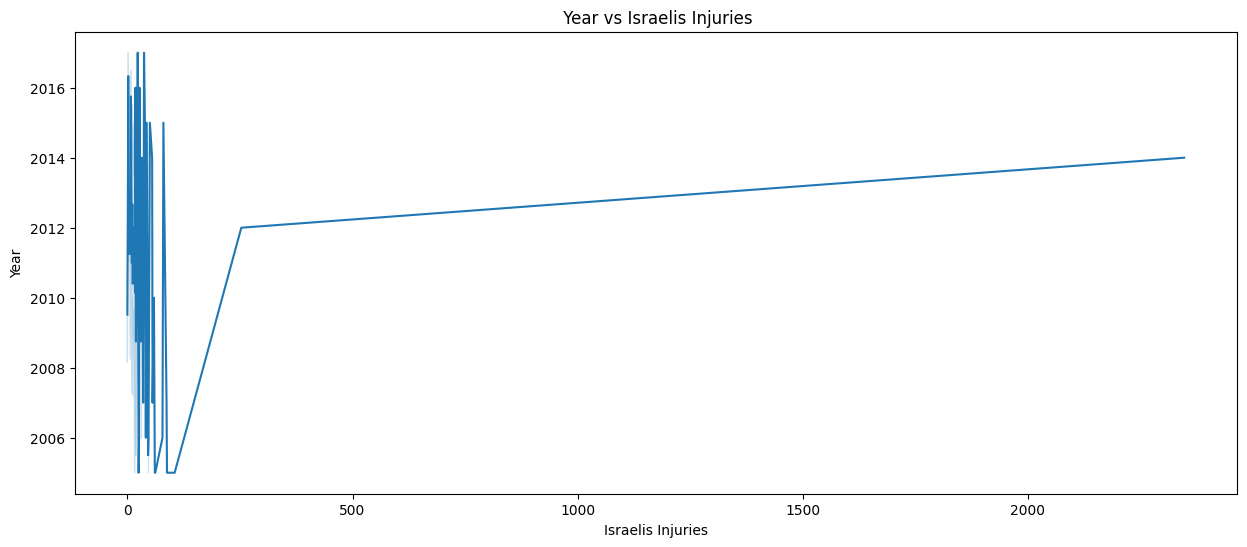

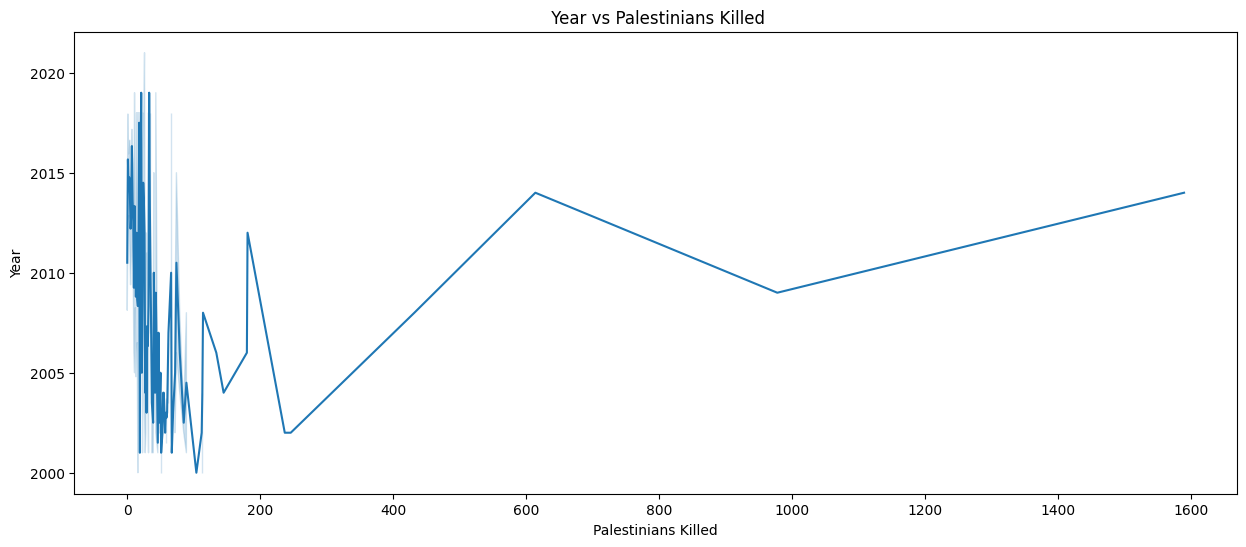

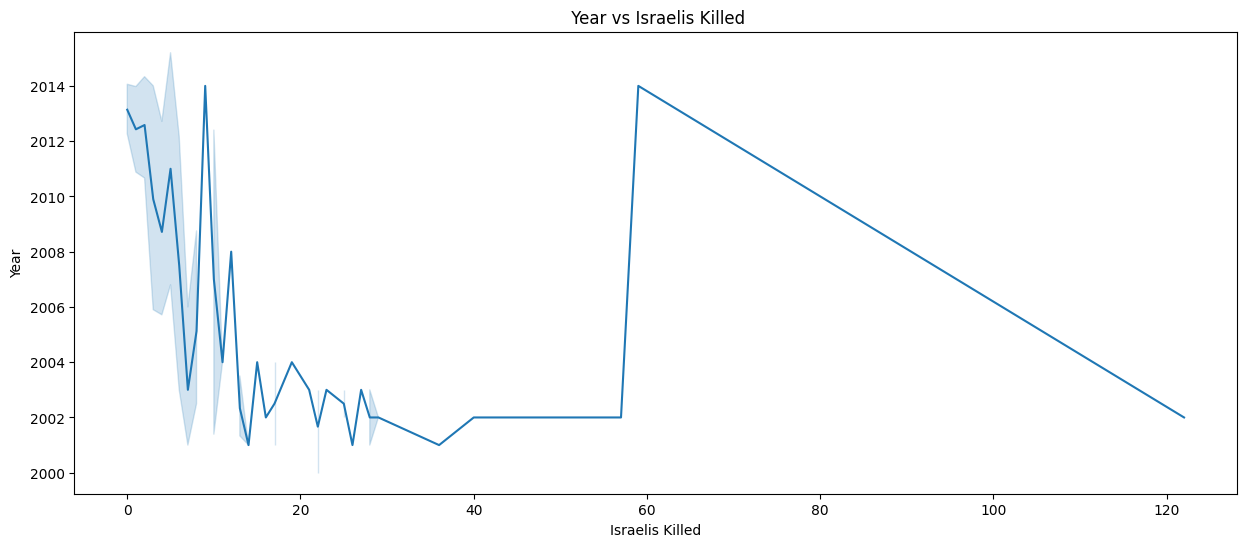

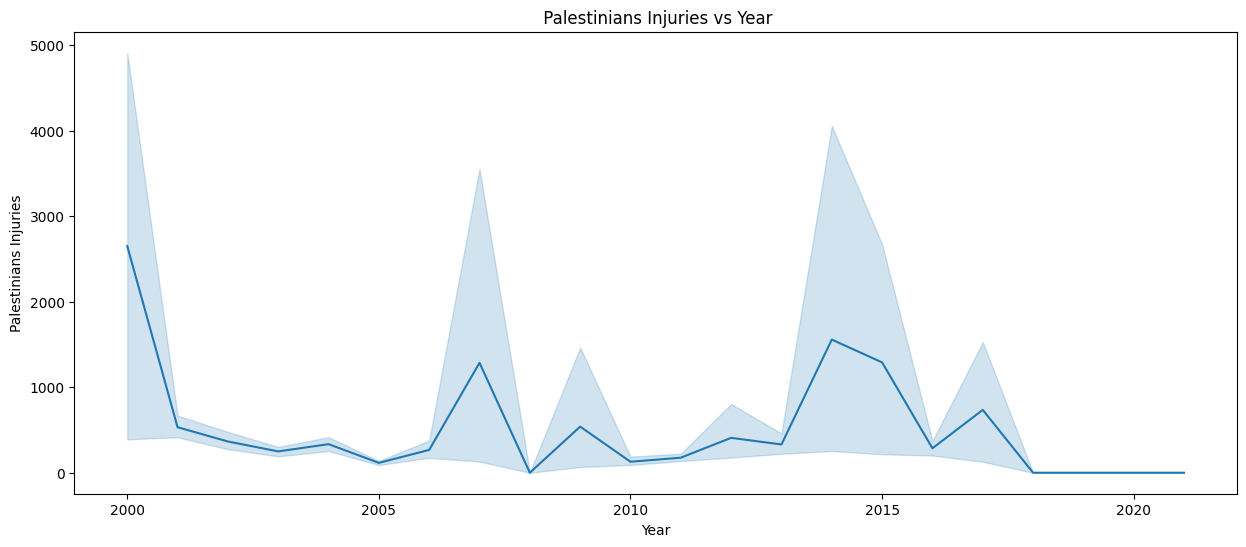

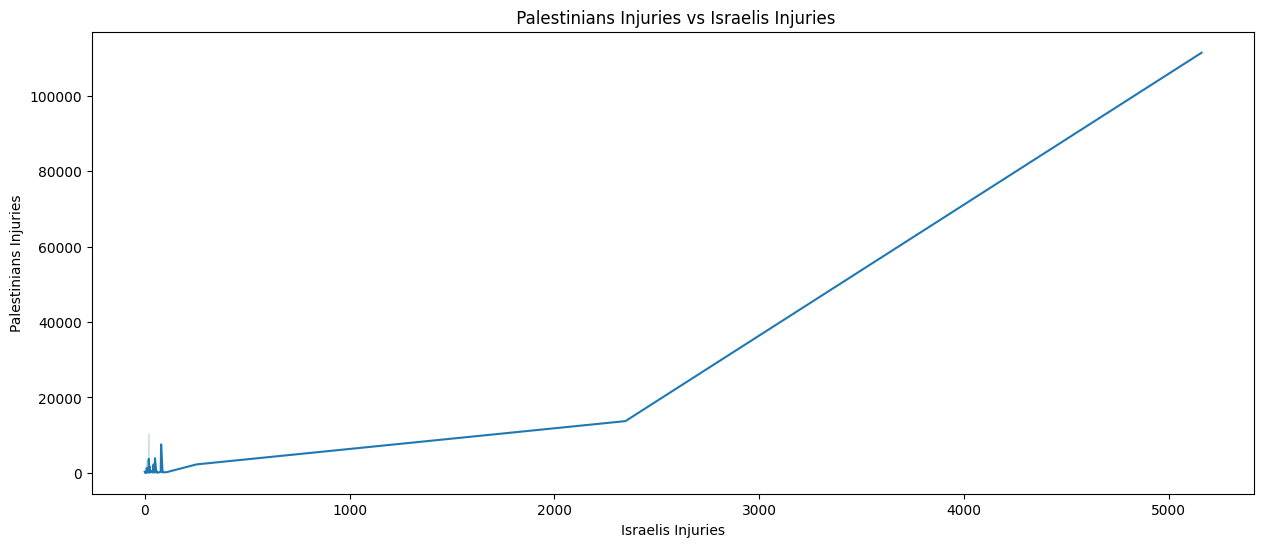

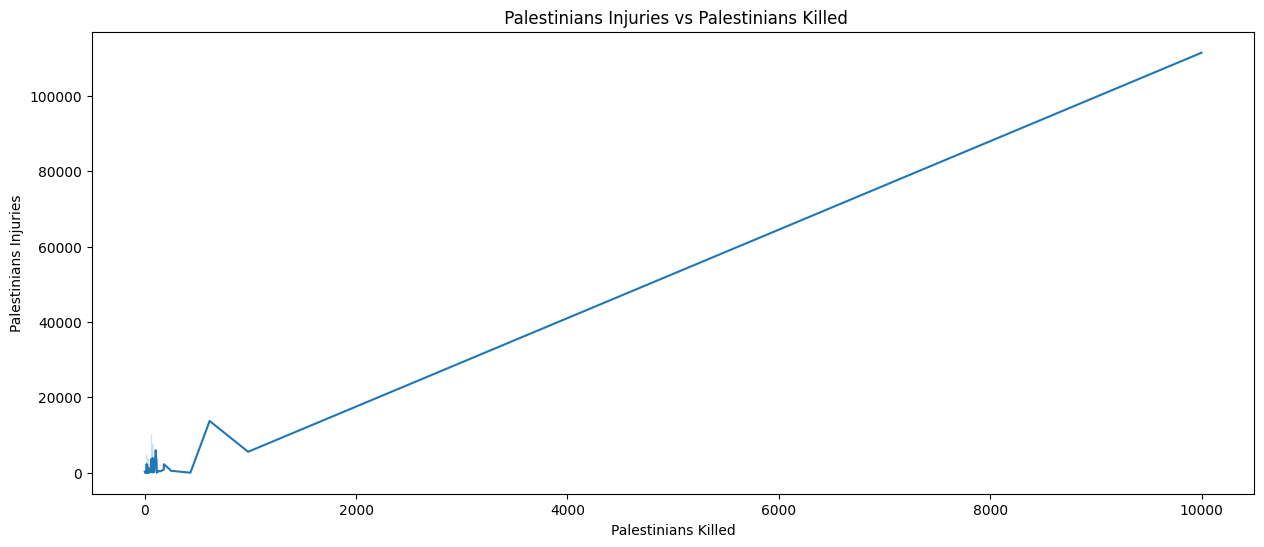

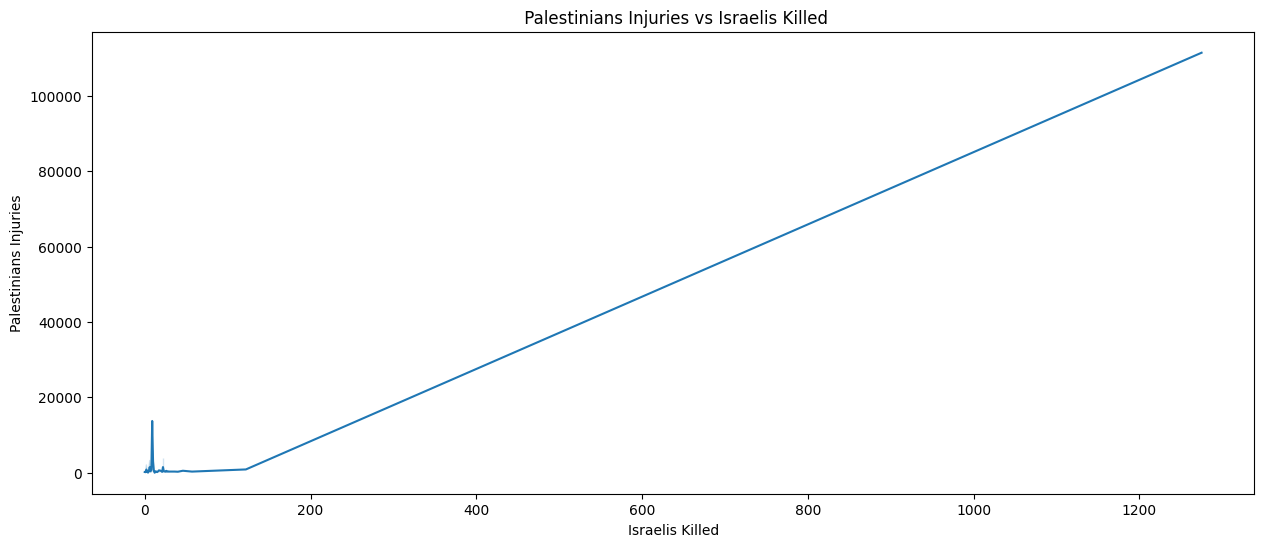

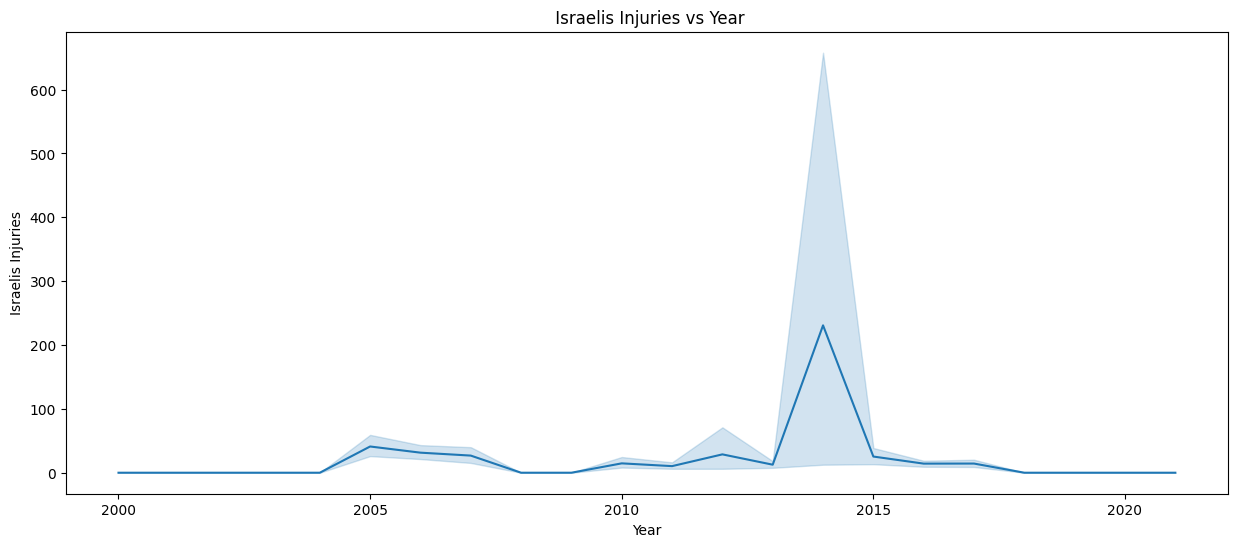

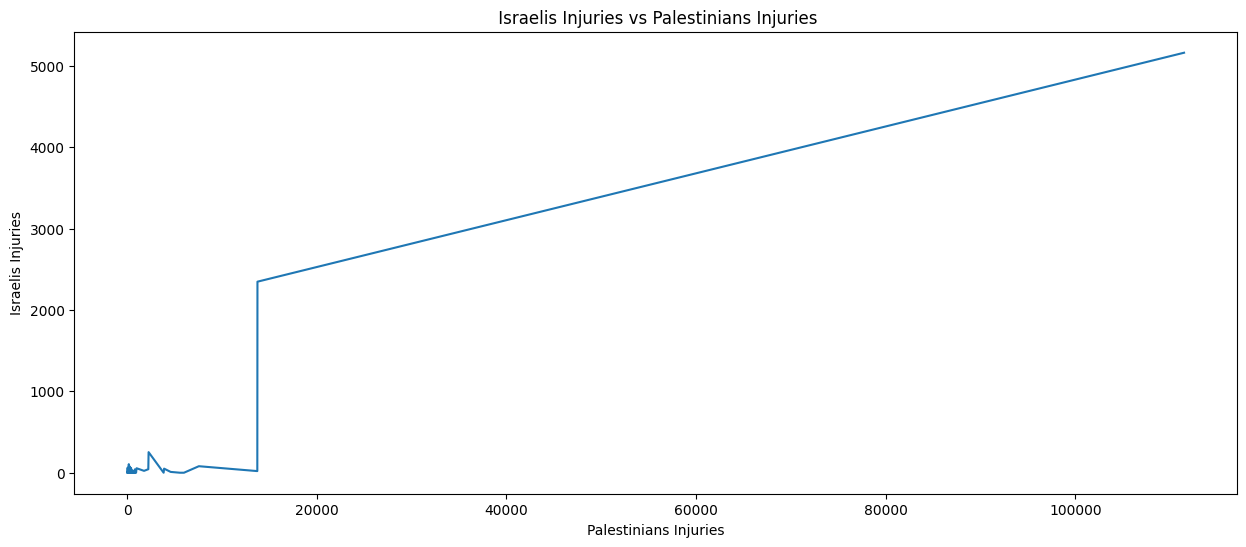

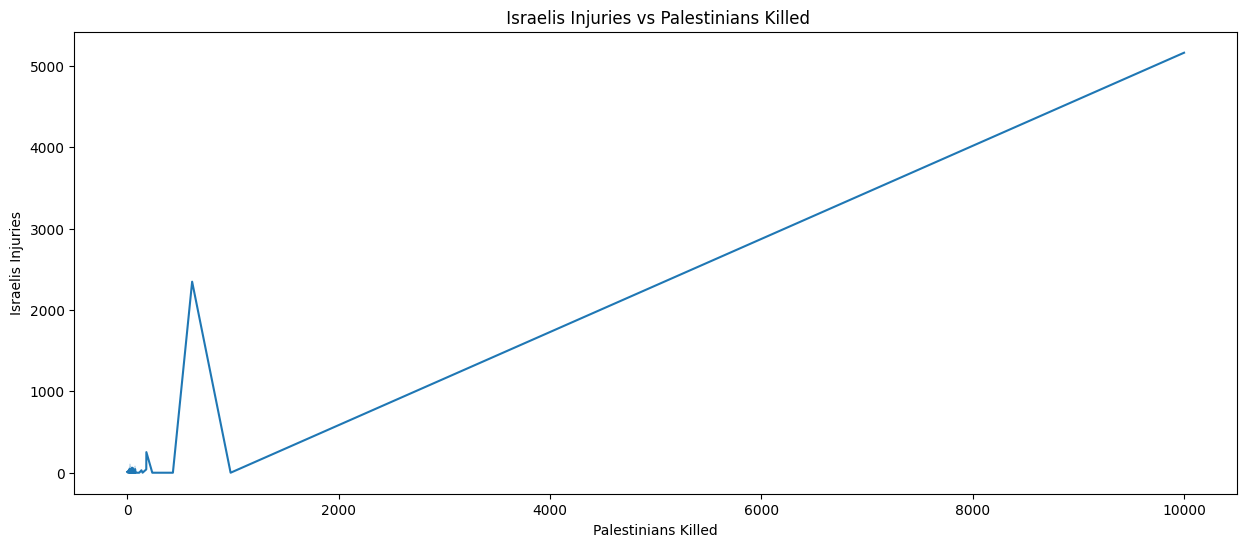

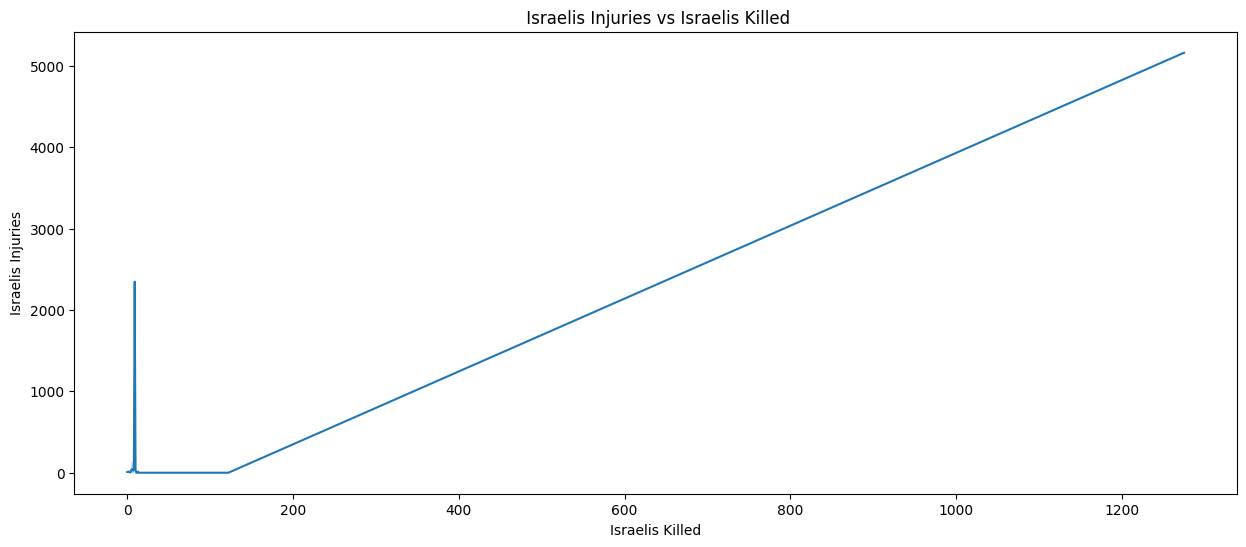

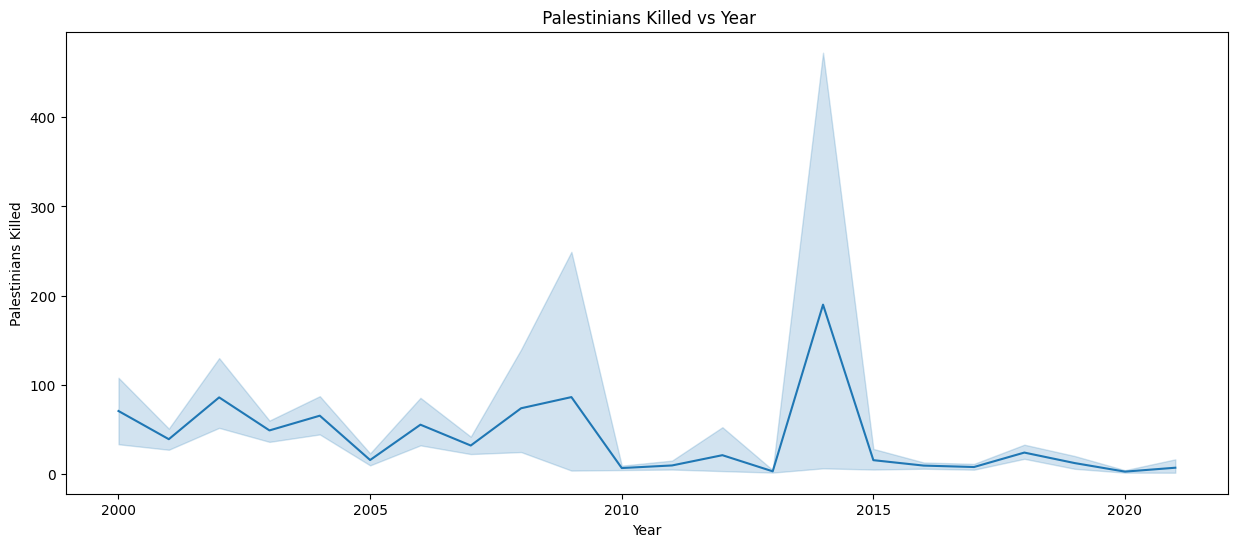

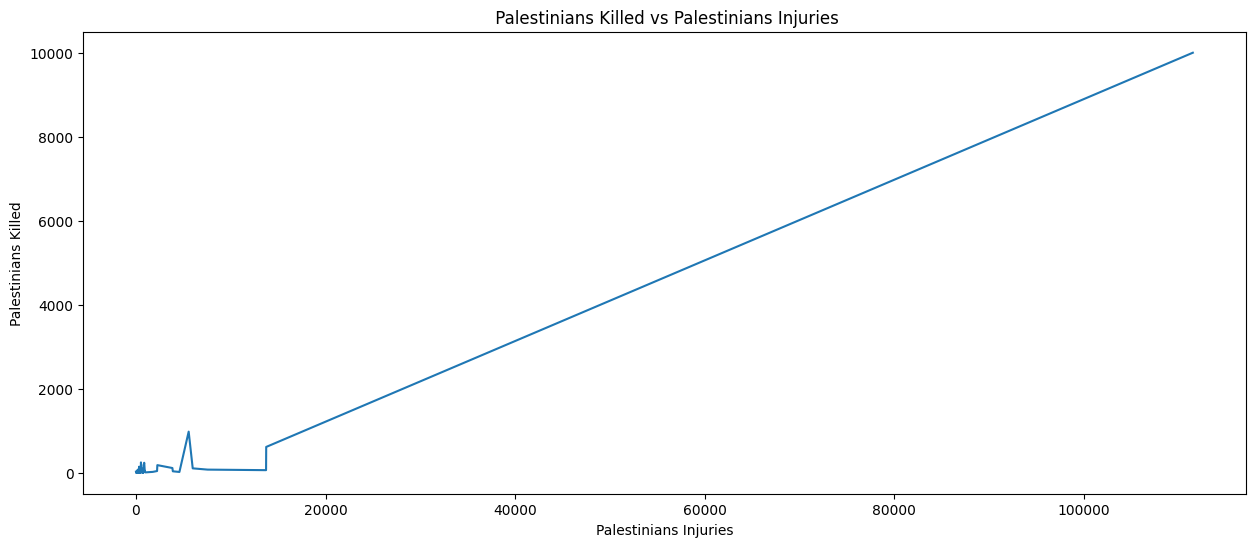

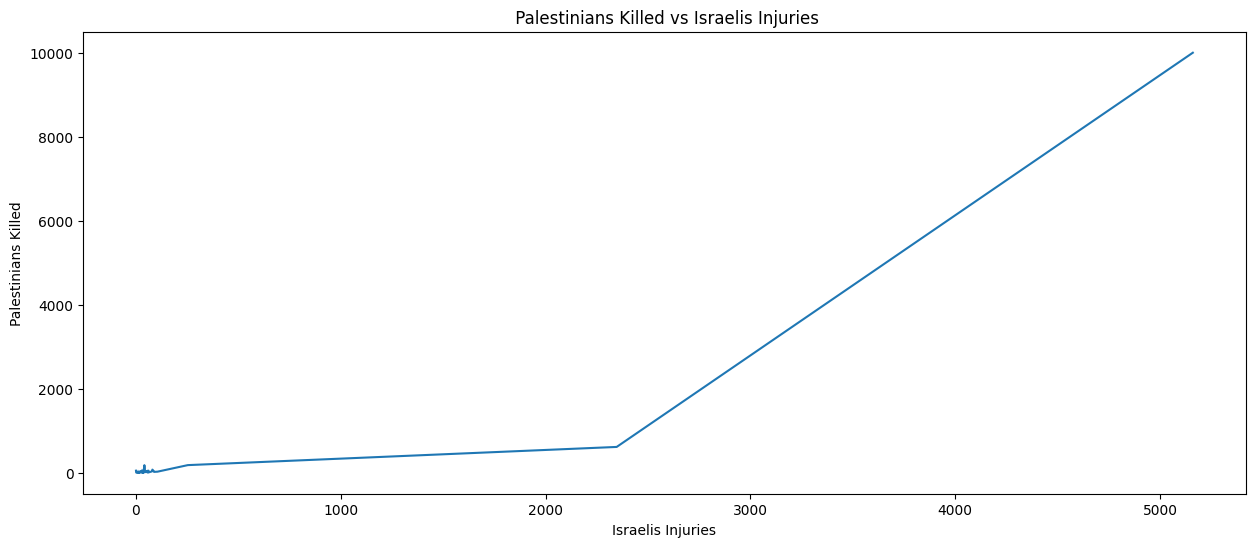

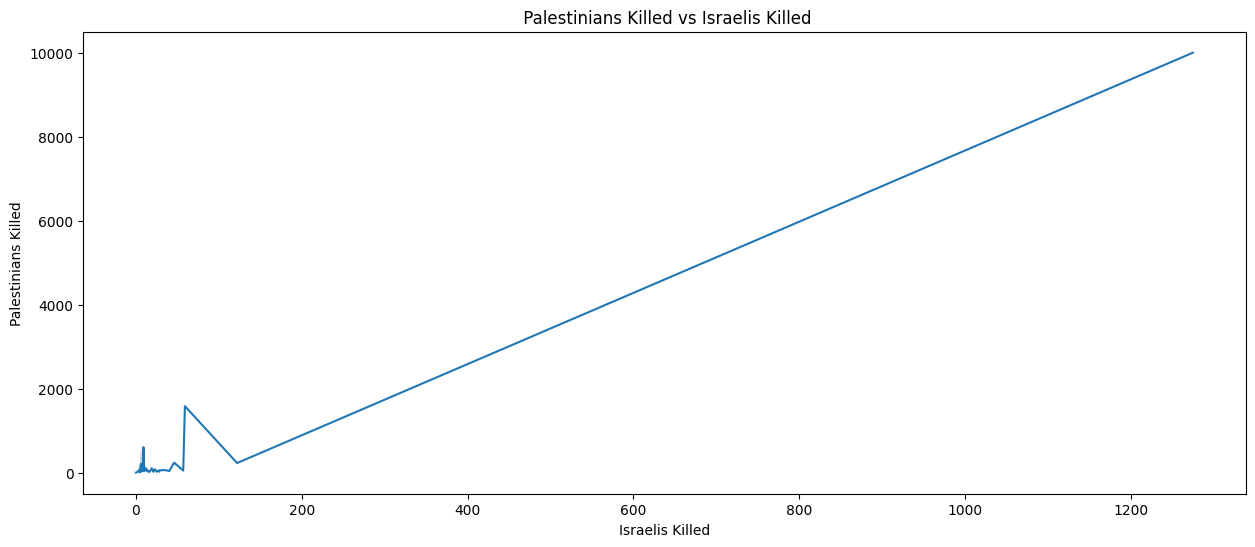

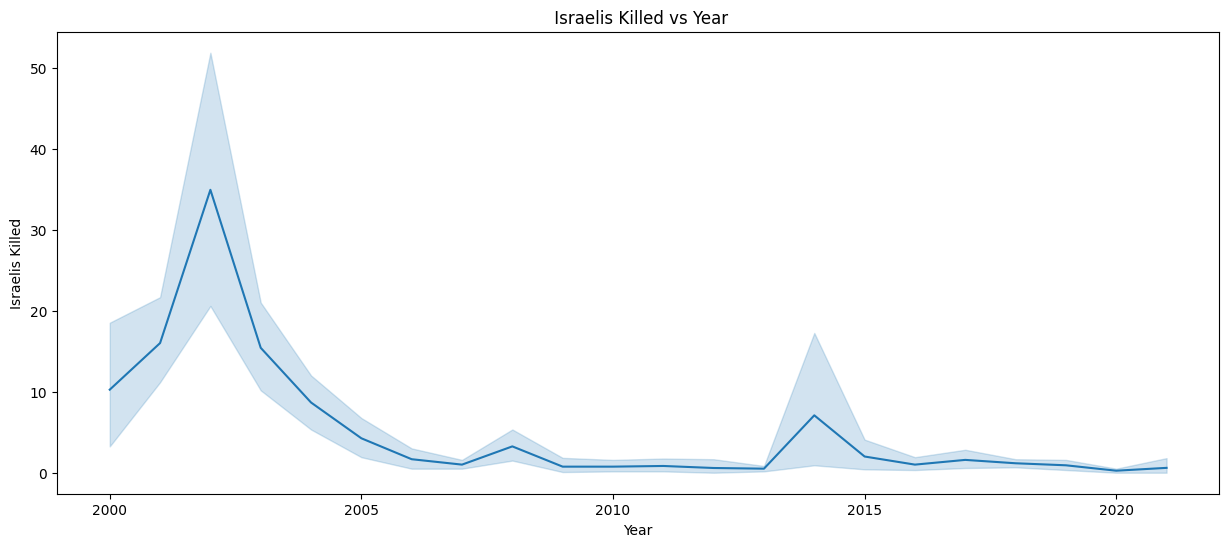

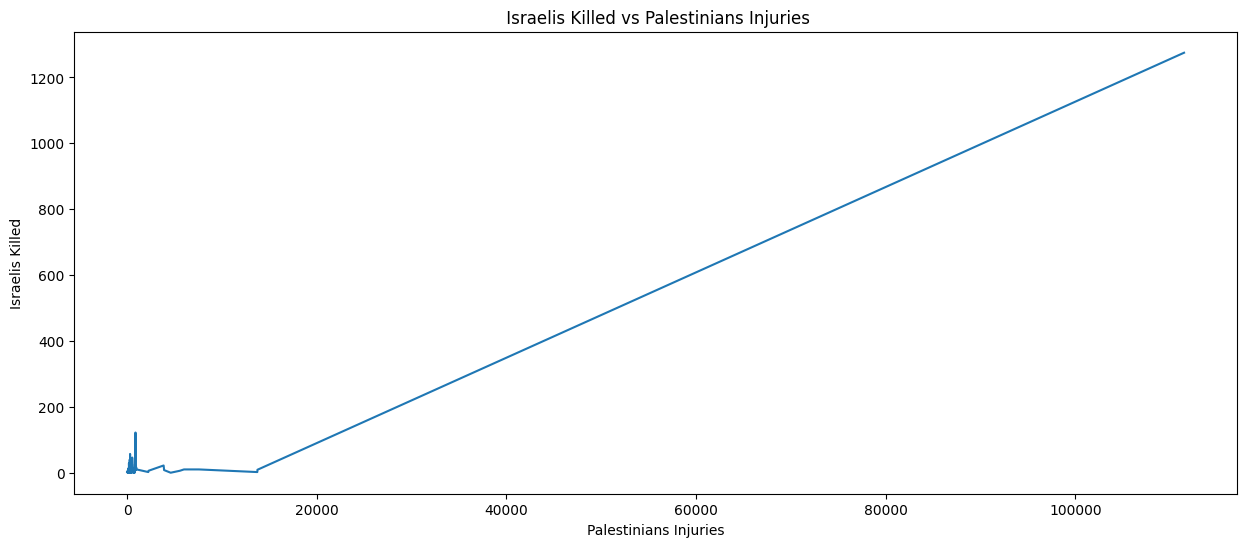

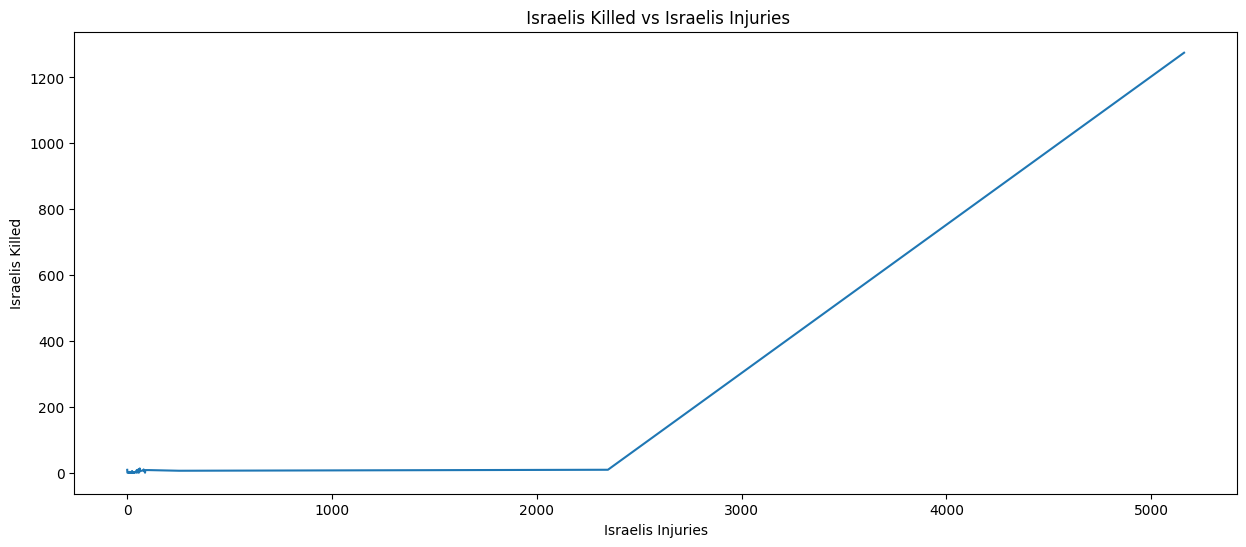

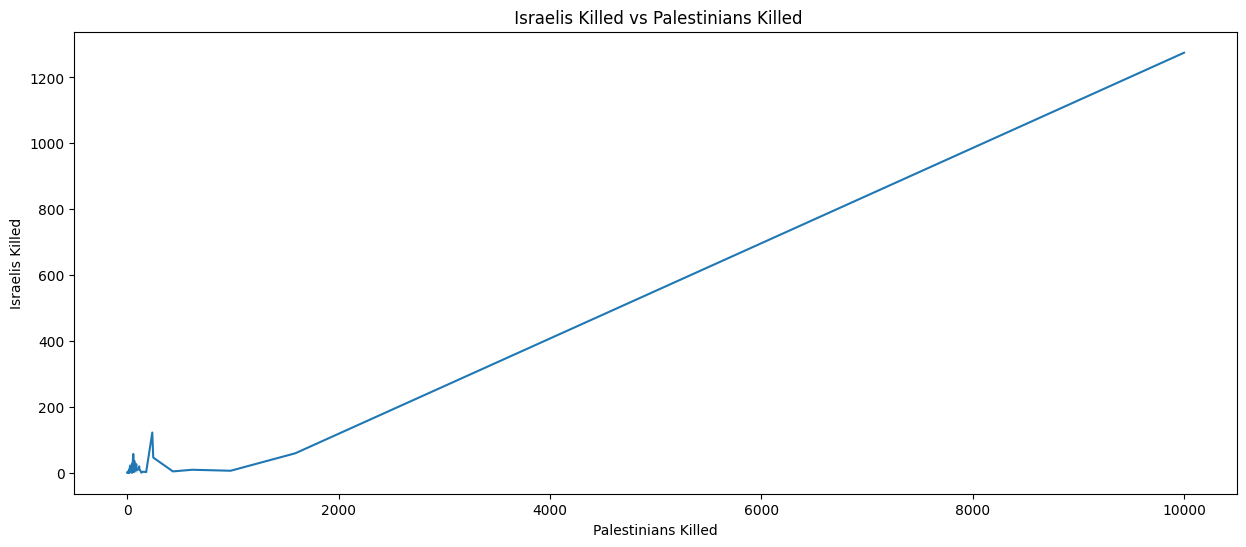

In [ ]:
for i in df1.columns:
    for j in df1.columns:
        if i != j:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df1[j], y=df1[i], data=df1, palette='hls')
            plt.title(f' {i} vs {j}')
            plt.show()

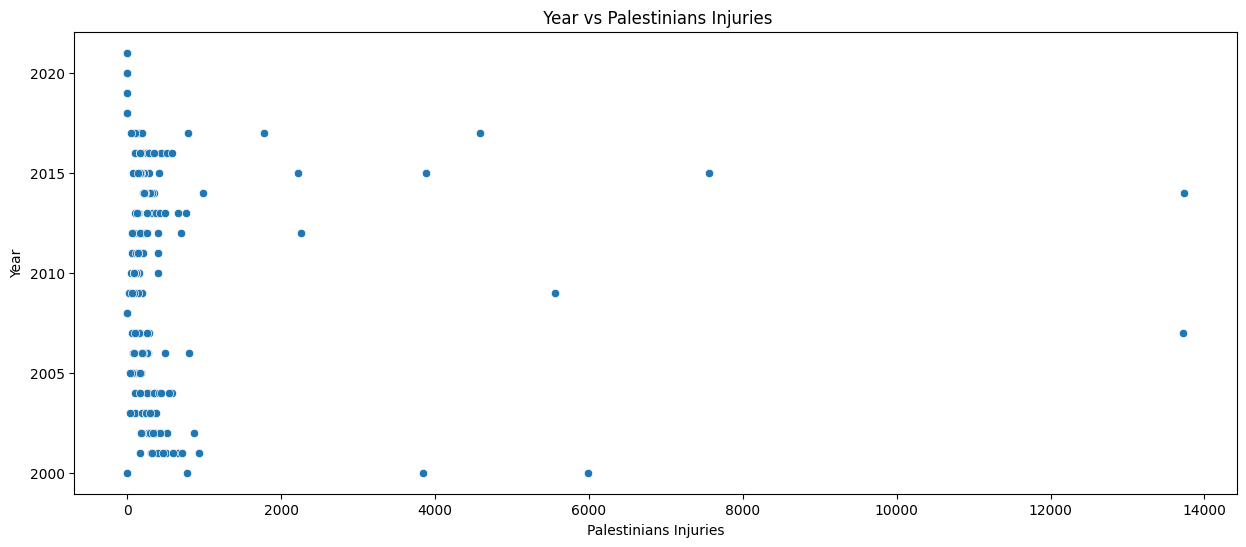

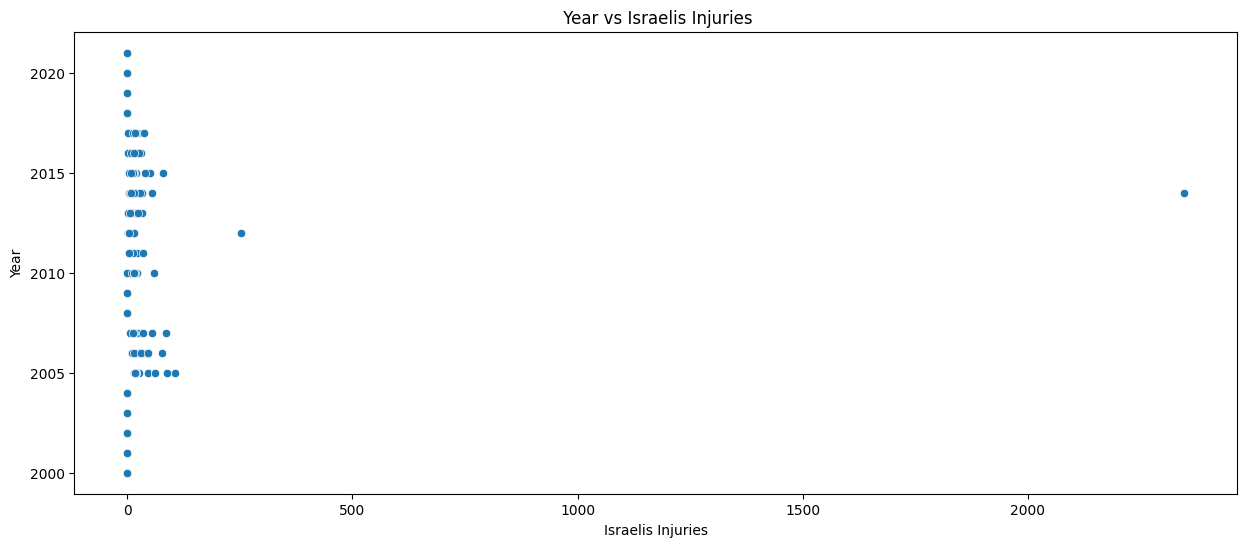

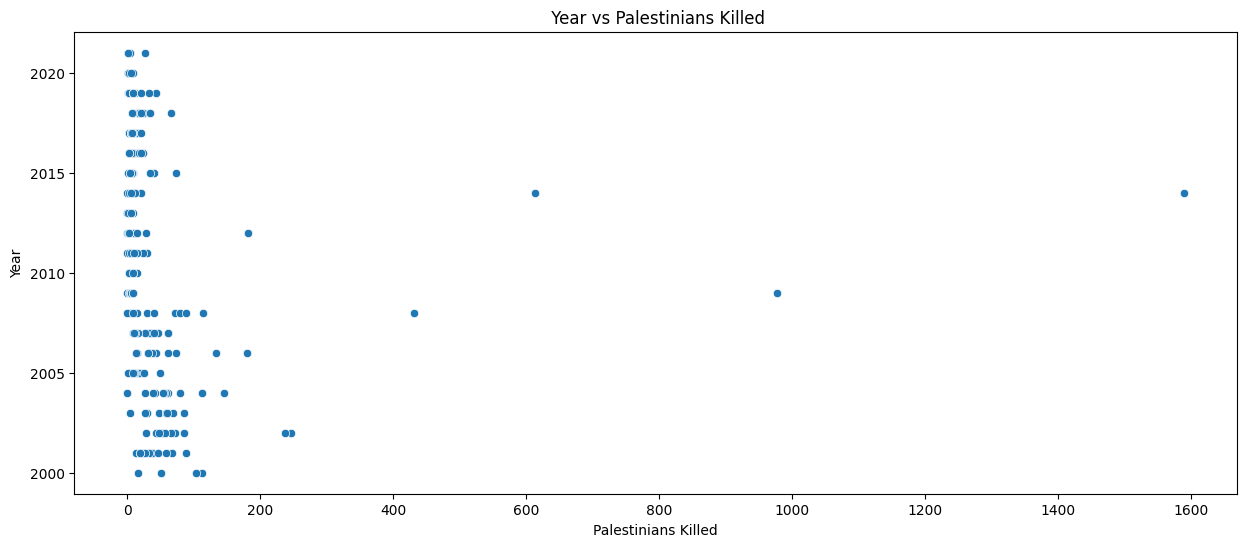

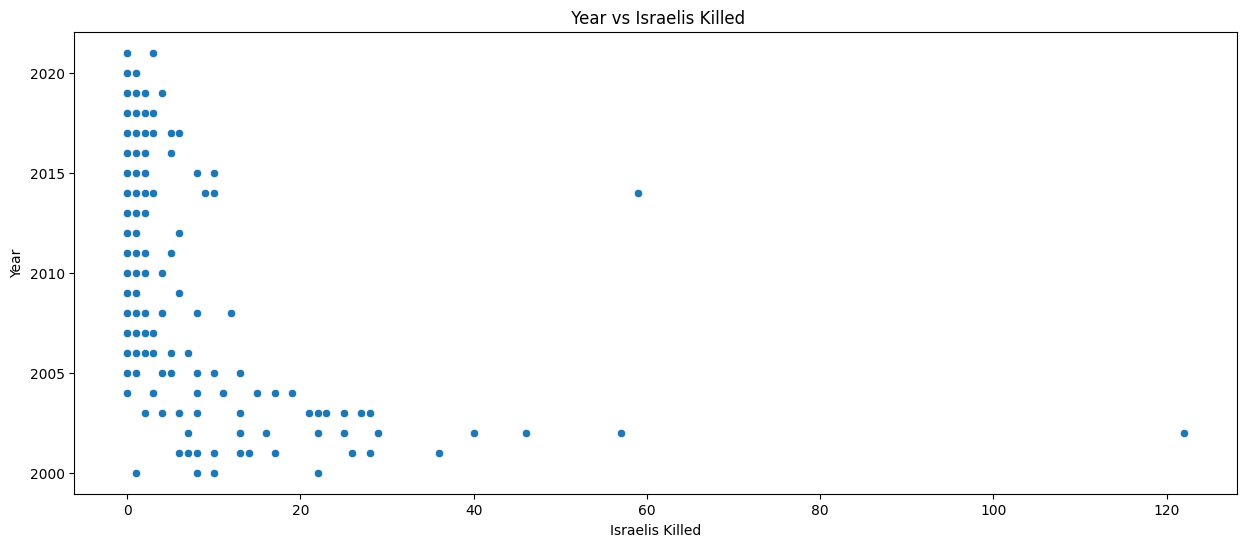

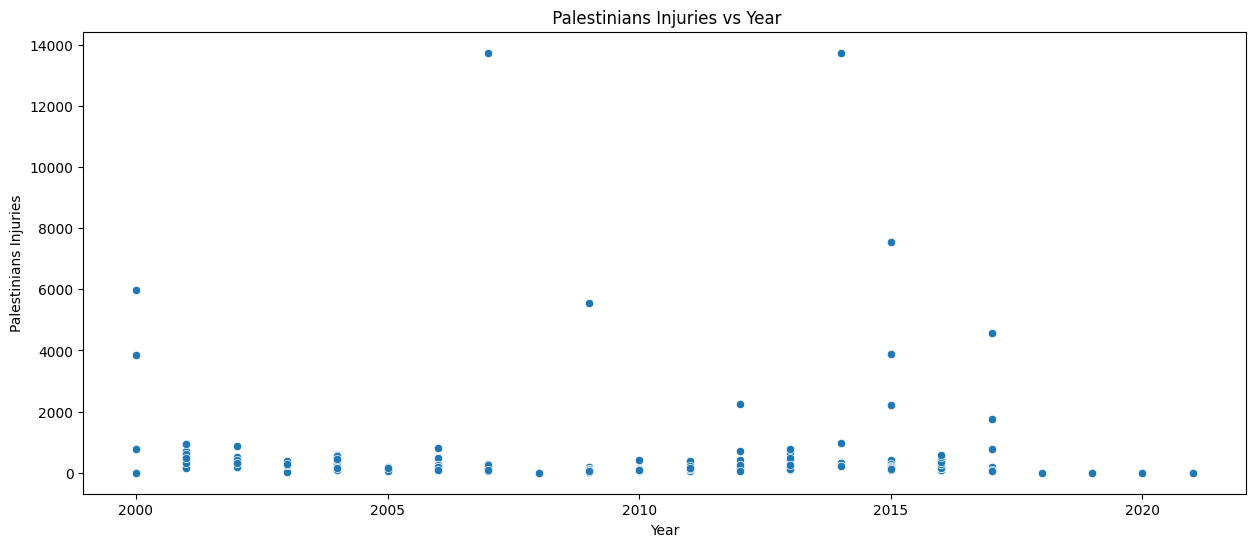

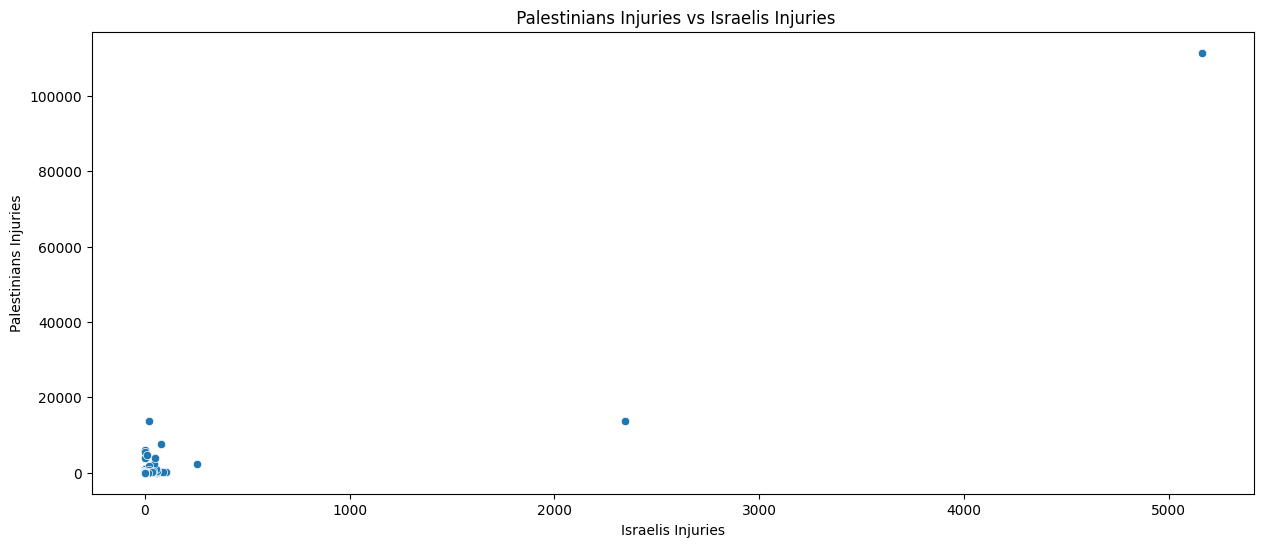

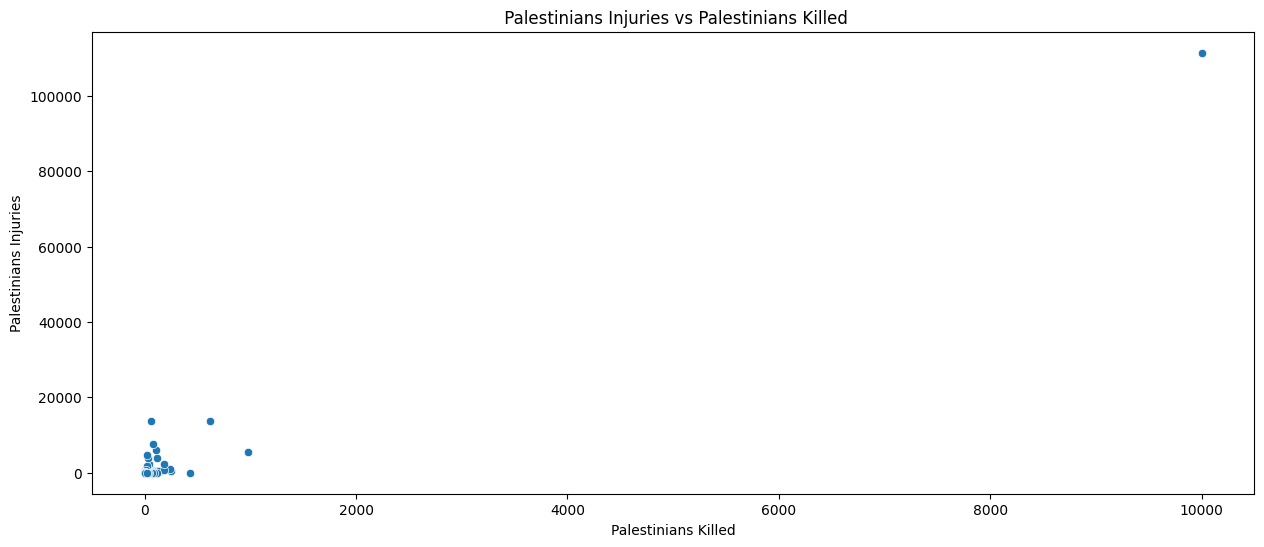

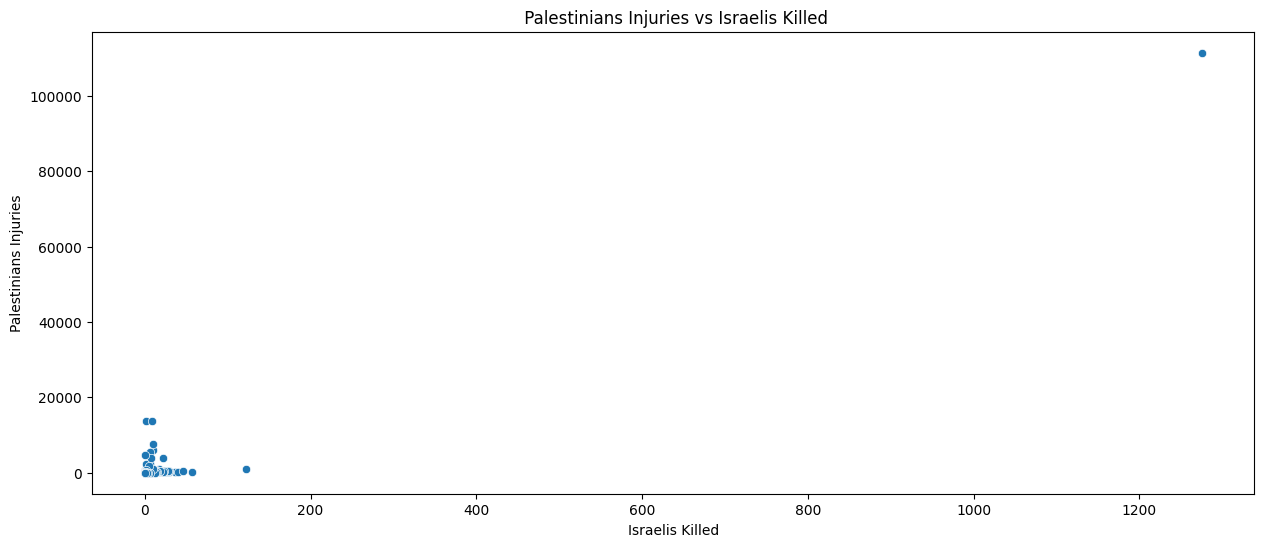

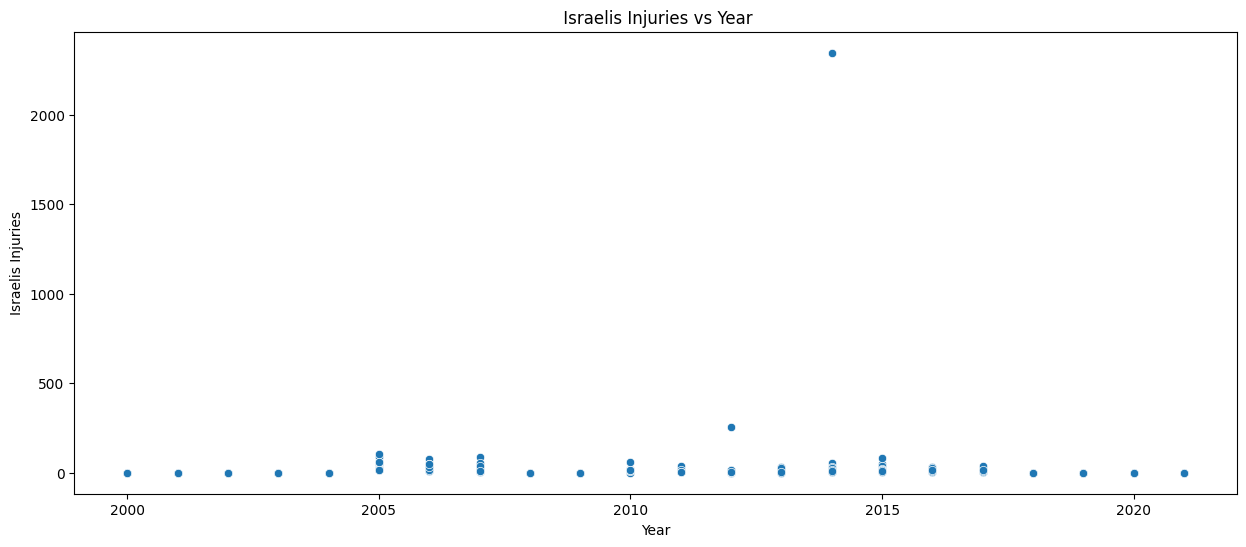

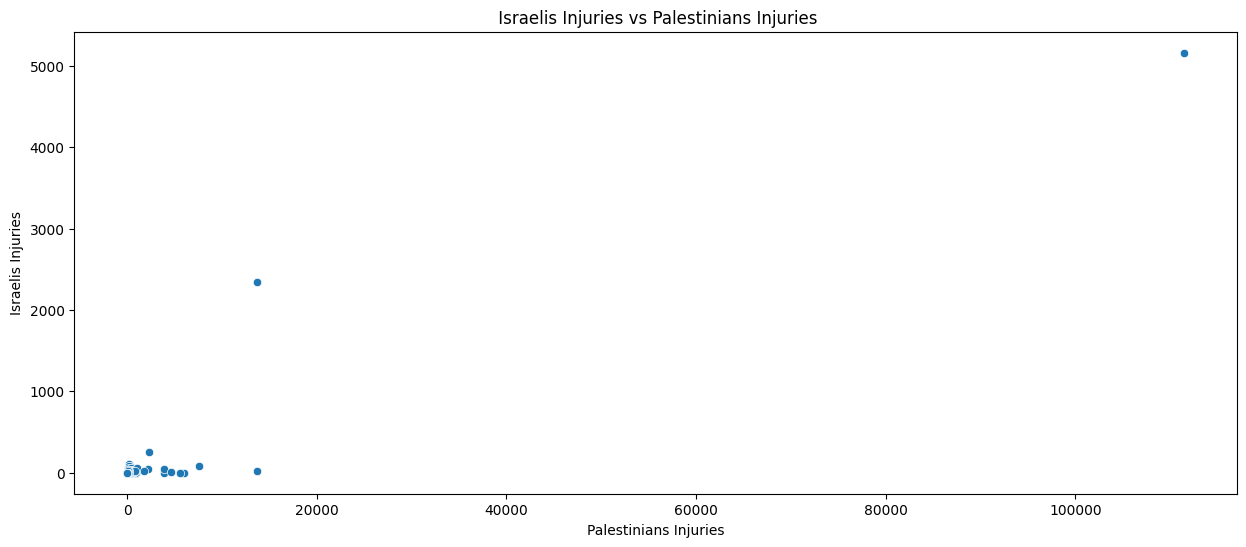

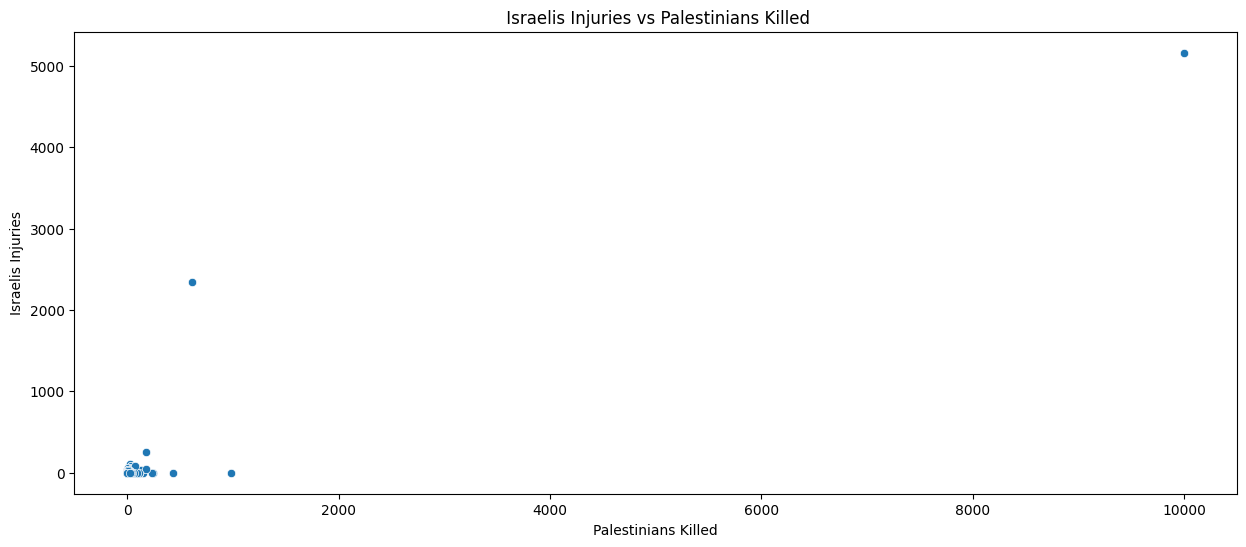

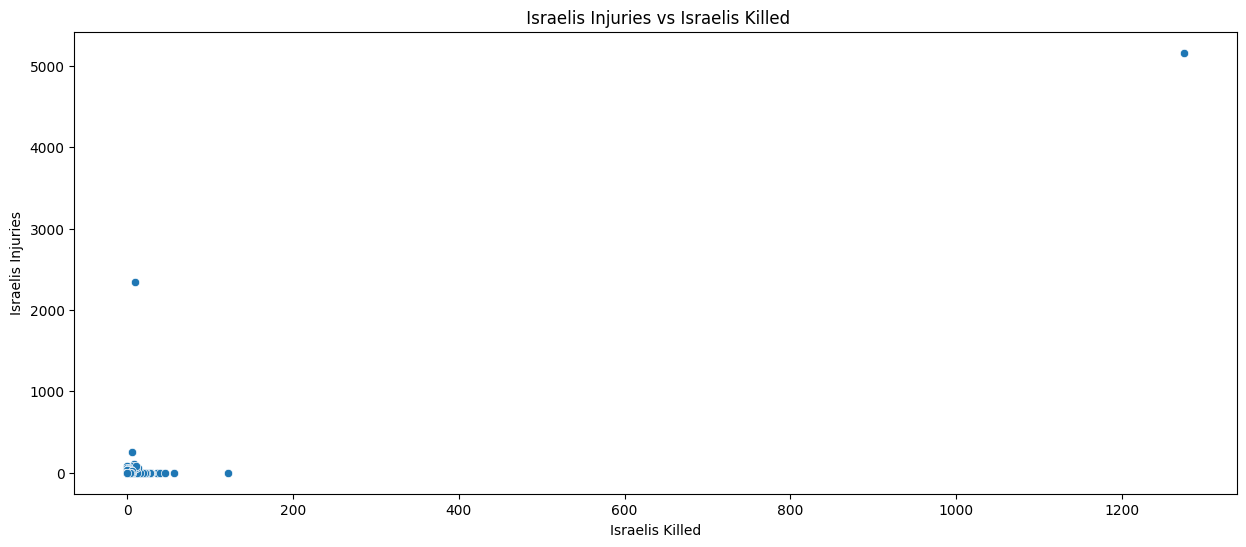

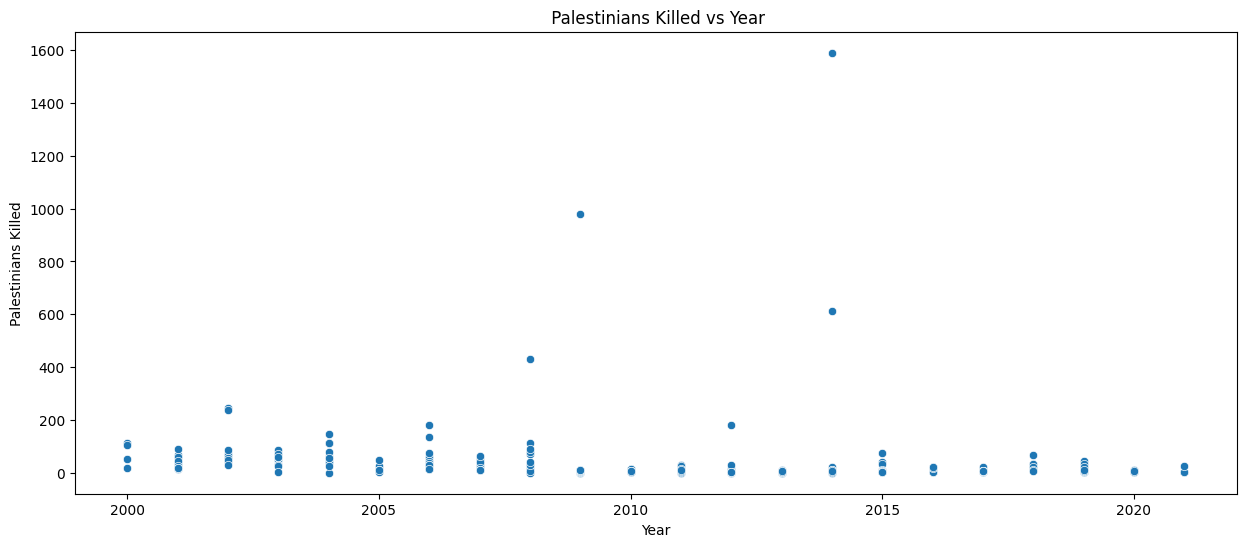

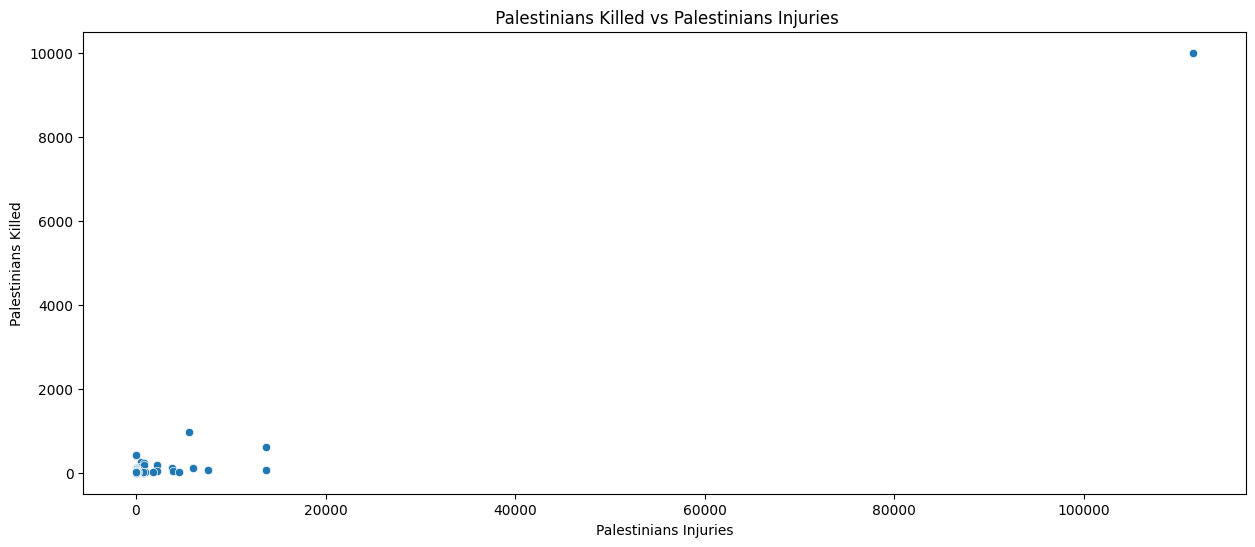

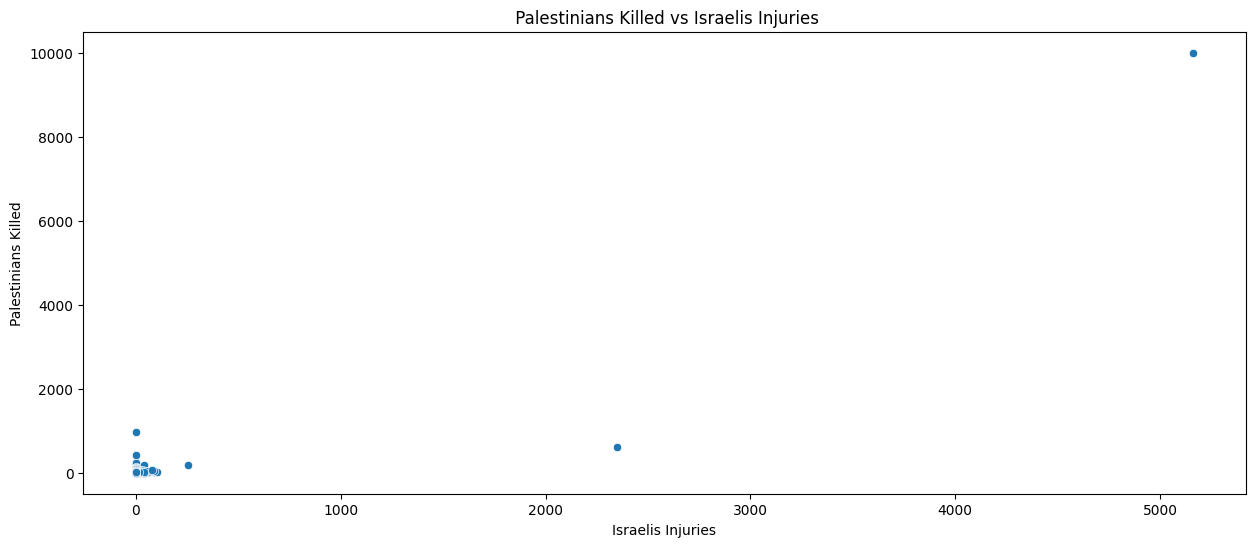

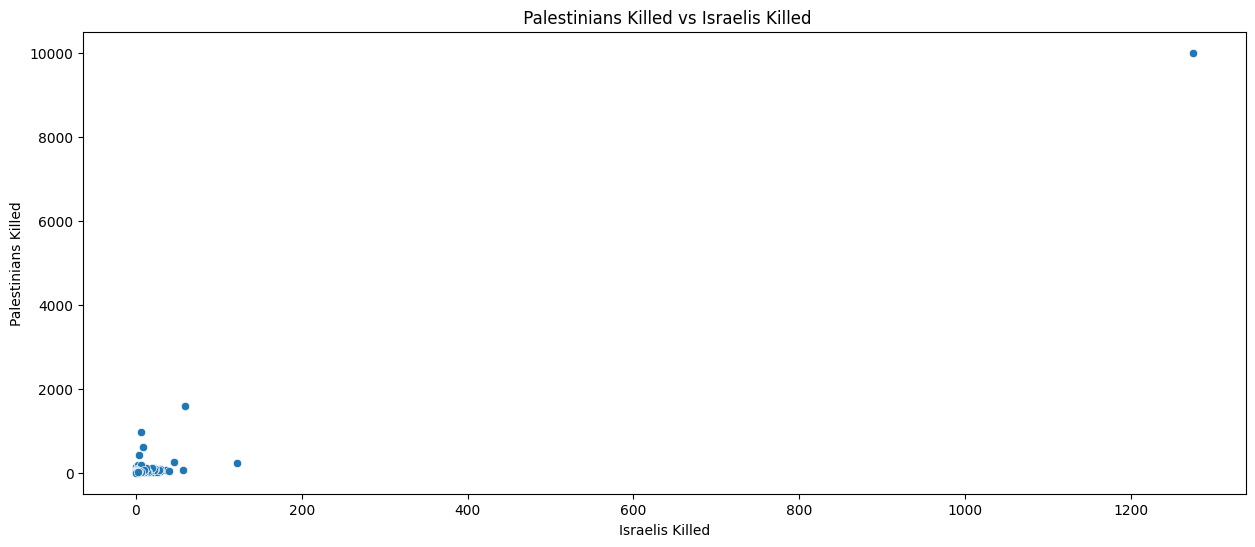

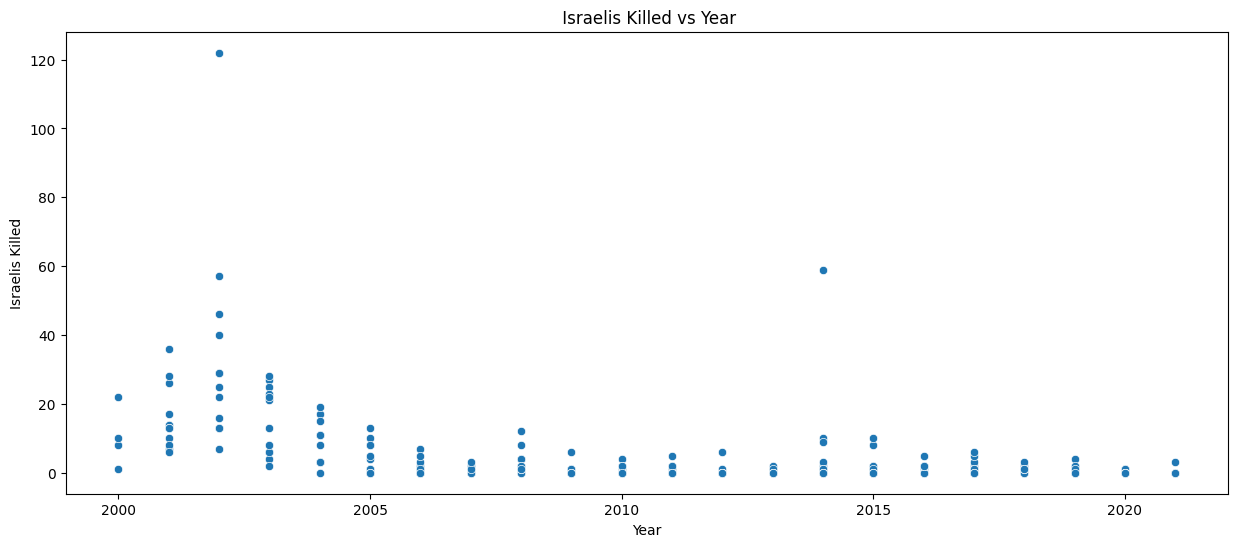

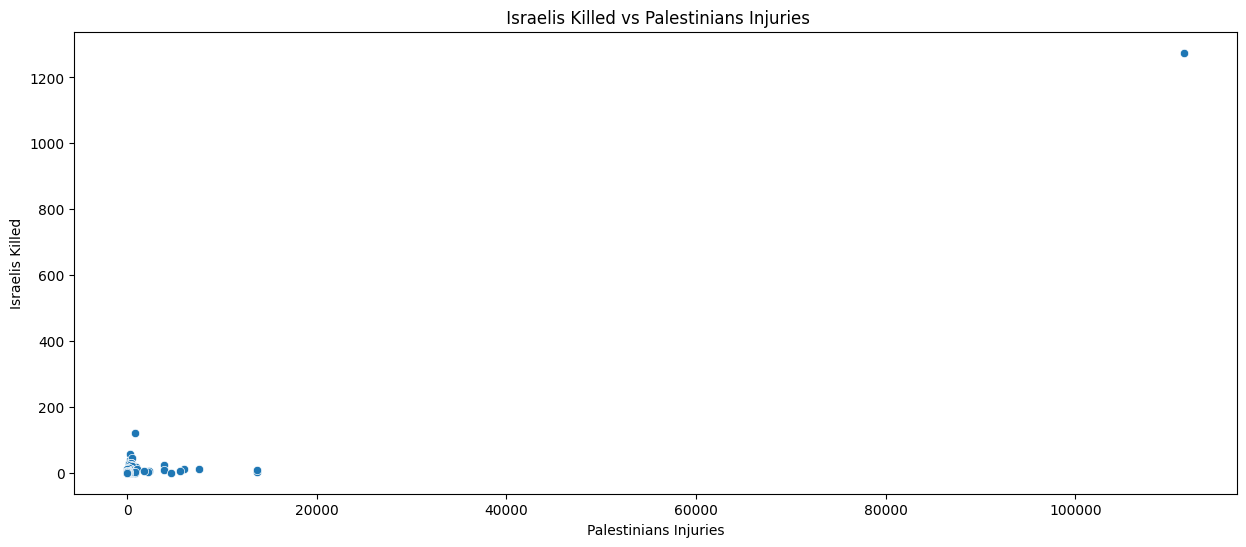

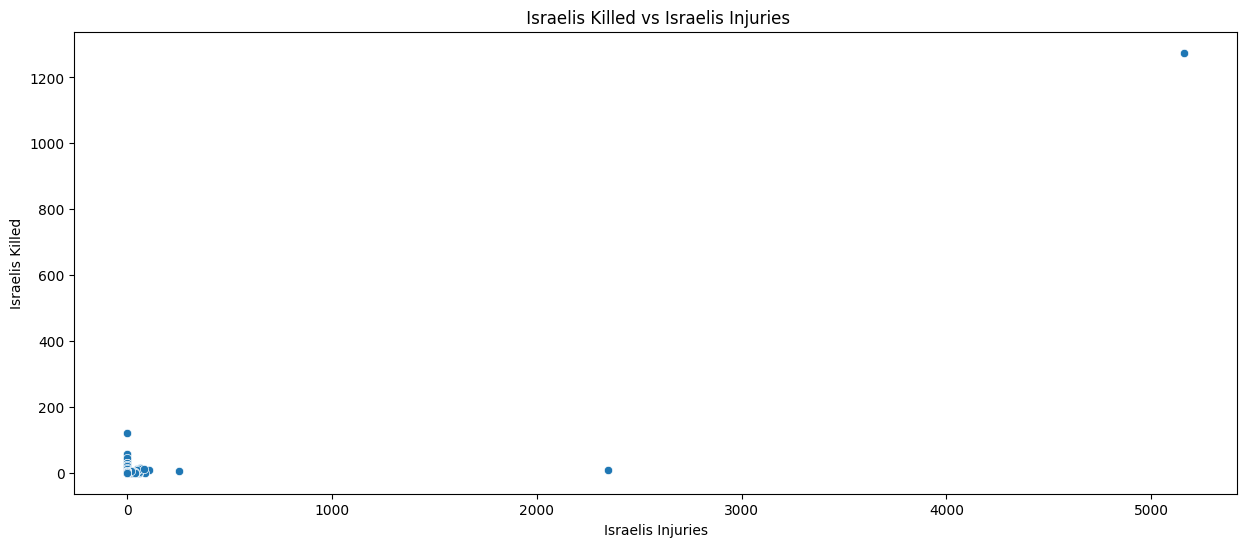

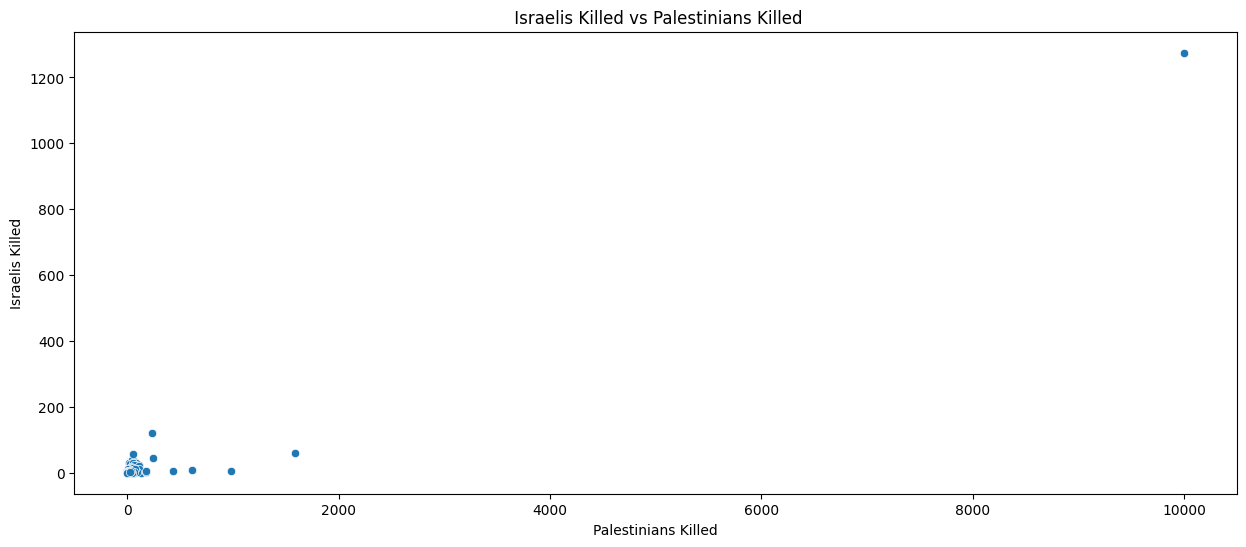

In [ ]:
for i in df1.columns:
    for j in df1.columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x = df1[j], y = df1[i], data = df1, palette = 'hls')
            plt.title(f' {i} vs {j}')
            plt.show()

In [ ]:
for i in df1.columns:
    for j in df1.columns:
        if i != j:
            fig = px.line(df1, x=j, y=i, title=f'Line Plot: {i} vs {j}')
            fig.show()

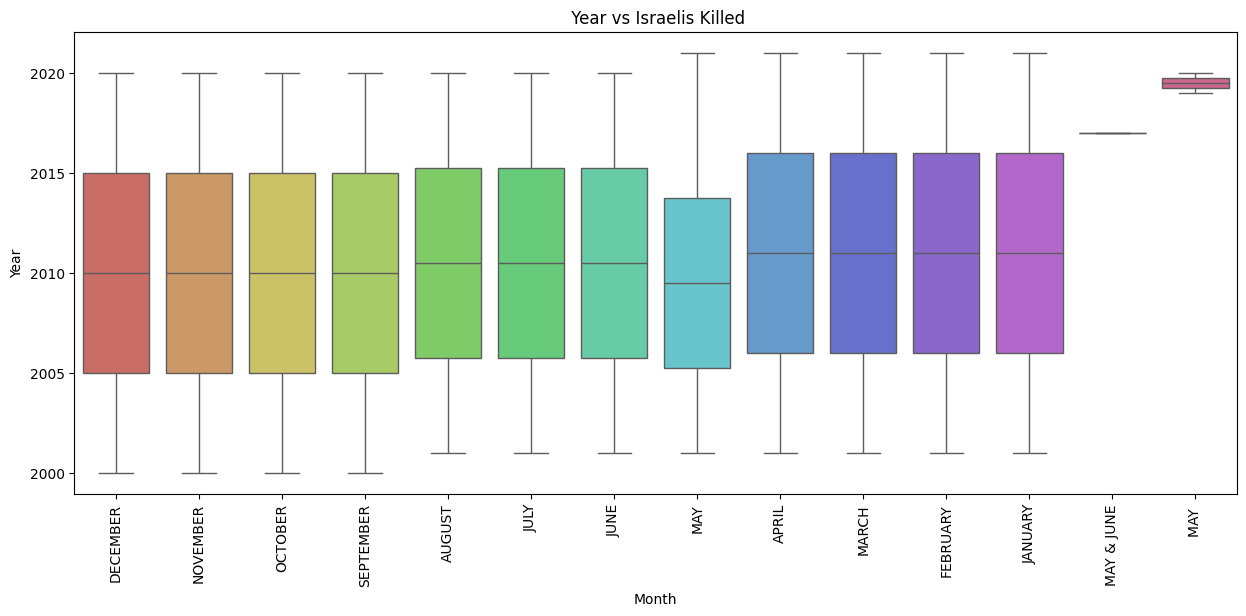

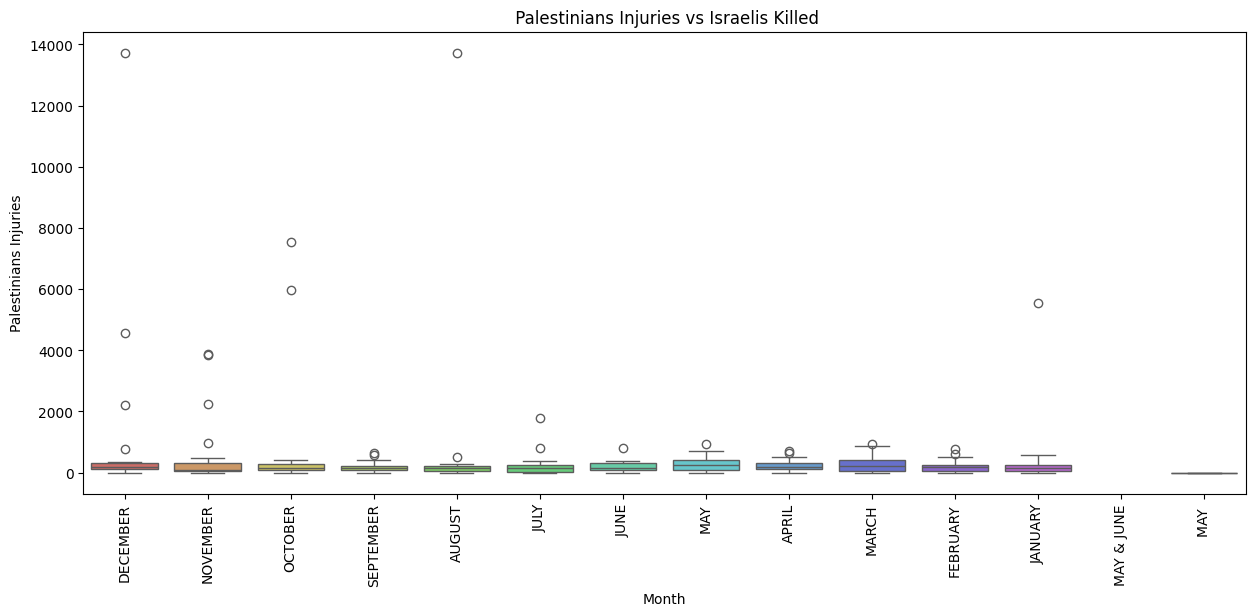

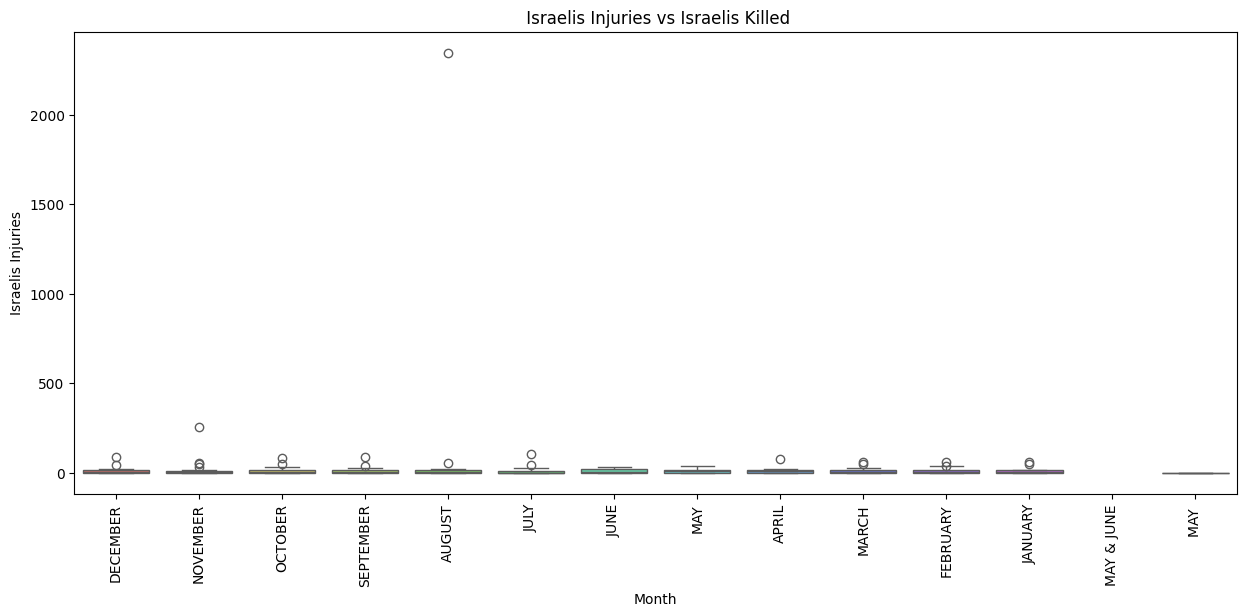

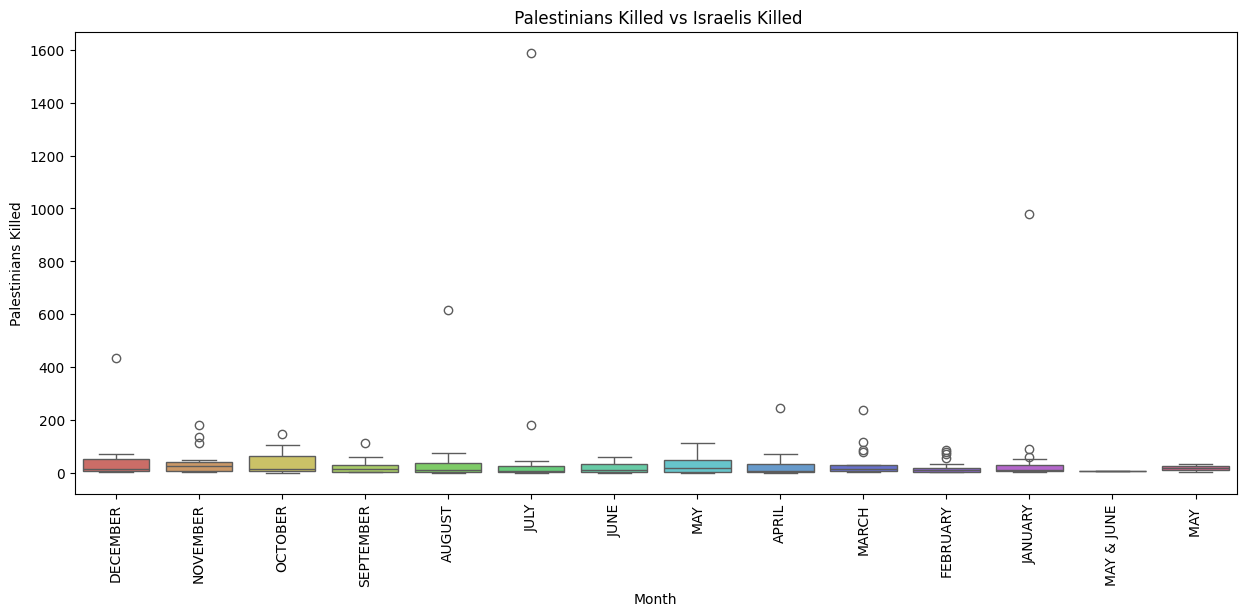

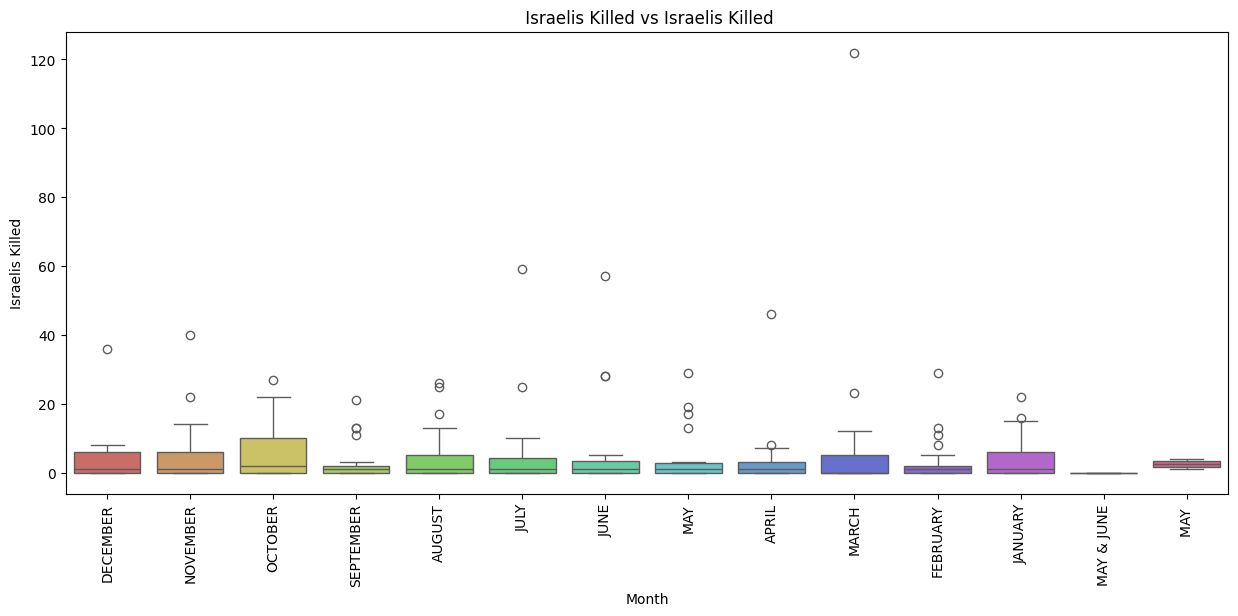

In [ ]:
for i in df1.columns:
        plt.figure(figsize=(15,6))
        sns.boxplot(x = df['Month'] , y = df1[i] , data = df, palette = 'hls')
        plt.xticks(rotation = 90)
        plt.title(f' {i} vs {j}')
        plt.show()

In [ ]:
for i in df1.columns:
    fig = px.box(df1, x=df['Month'], y=i, title=f'Box Plot: {i} by Month')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

In [ ]:
for i in df1.columns:
    fig = px.box(df1, x=df['Month'], y=i, title=f'Box Plot: {i} by Month')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

In [ ]:
for i in df1.columns:
    fig = px.violin(df1, x=df['Month'], y=i, title=f'Box Plot: {i} by Month')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

In [ ]:
fig = px.line(df, x='Year', y=['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed','Israelis Killed'])
fig.show()

In [ ]:
fig = px.line(df, x='Month', y=['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed','Israelis Killed'])
fig.show()

In [ ]:
for i in ['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']:
    fig = px.box(df, x='Month', y=i, title=f'Box Plot: {i} by Month')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

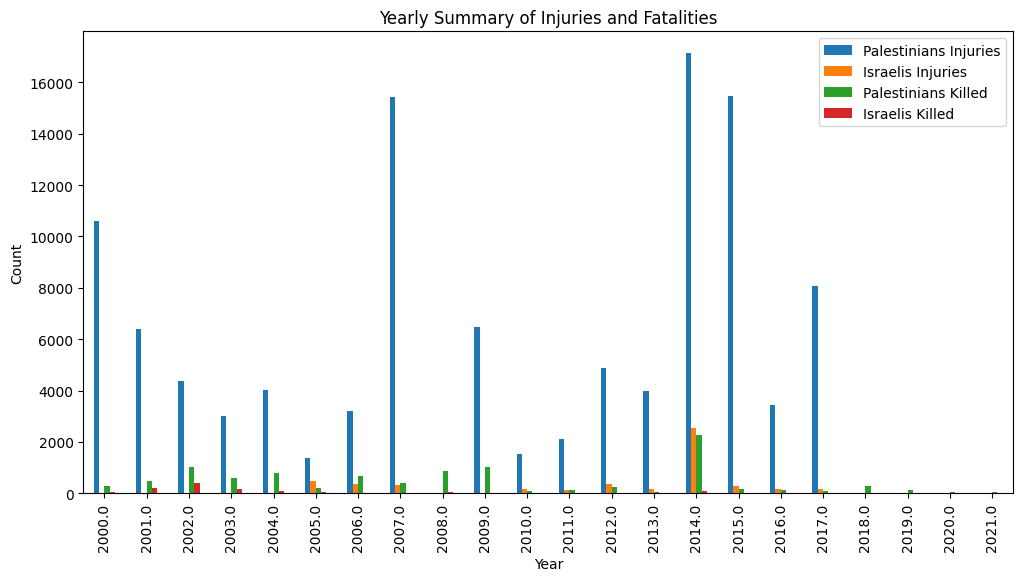

In [ ]:
yearly_summary = df.groupby('Year')[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].sum()
yearly_summary.plot(kind='bar', figsize=(12, 6), title='Yearly Summary of Injuries and Fatalities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
fig = go.Figure()

for col in yearly_summary.columns:
    fig.add_trace(go.Bar(x=yearly_summary.index, y=yearly_summary[col], name=col))

fig.update_layout(
    title='Yearly Summary of Injuries and Fatalities',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Count'),
    barmode='stack'
)

fig.show()

In [ ]:
fig = go.Figure()

for col in yearly_summary.columns:
    fig.add_trace(go.Bar(x=yearly_summary.index, y=yearly_summary[col], name=col))

fig.update_layout(
    title='Monthly Summary of Injuries and Fatalities',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Count'),
    barmode='stack'
)

fig.show()


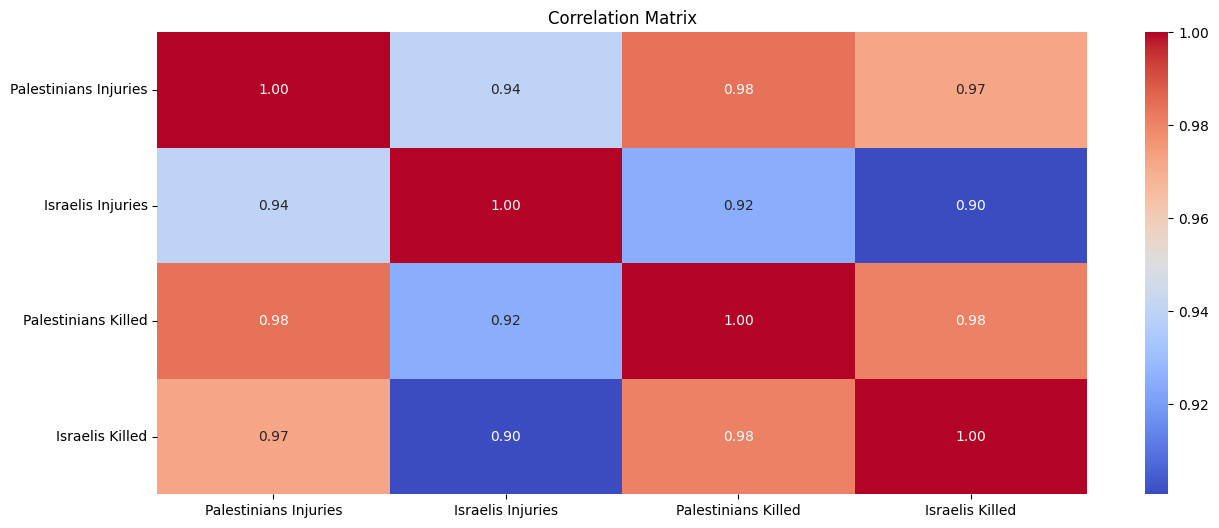

In [ ]:
plt.figure(figsize=(15, 6))
correlation_matrix = df[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['Total Incidents'] = df['Palestinians Injuries'] + df['Israelis Injuries'] + df['Palestinians Killed'] + df['Israelis Killed']
df['Palestinian Fatality Rate'] = df['Palestinians Killed'] / df['Total Incidents']
df['Israeli Fatality Rate'] = df['Israelis Killed'] / df['Total Incidents']

In [ ]:
total_incidents = df['Total Incidents'].sum()
total_palestinian_incidents = df['Total Incidents'].sum()
total_israeli_incidents = df['Total Incidents'].sum()
palestinian_proportion = total_palestinian_incidents / total_incidents
israeli_proportion = total_israeli_incidents / total_incidents

In [ ]:
df

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,Total Incidents,Palestinian Fatality Rate,Israeli Fatality Rate
0,2000.0,DECEMBER,781.0,0.0,51.0,8,840.0,0.060714,0.009524
1,2000.0,NOVEMBER,3838.0,0.0,112.0,22,3972.0,0.028197,0.005539
2,2000.0,OCTOBER,5984.0,0.0,104.0,10,6098.0,0.017055,0.001640
3,2000.0,SEPTEMBER,0.0,0.0,16.0,1,17.0,0.941176,0.058824
4,2001.0,DECEMBER,304.0,0.0,67.0,36,407.0,0.164619,0.088452
...,...,...,...,...,...,...,...,...,...
246,2021.0,MARCH,0.0,0.0,4.0,0,4.0,1.000000,0.000000
247,2021.0,APRIL,0.0,0.0,1.0,0,1.0,1.000000,0.000000
248,2021.0,MAY,0.0,0.0,26.0,3,29.0,0.896552,0.103448
249,NaN,NaN,0.0,0.0,NaN,0,NaN,NaN,NaN


In [ ]:
yearly_trends = df.groupby('Year')[['Total Incidents', 'Palestinians Killed', 'Israelis Killed']].sum()
yearly_trends

,Total Incidents,Palestinians Killed,Israelis Killed
Year,,,
2000.0,10927.0,283.0,41
2001.0,7048.0,470.0,192
2002.0,5833.0,1032.0,419
2003.0,3765.0,588.0,185
2004.0,4899.0,786.0,104
2005.0,2119.0,190.0,51
2006.0,4261.0,665.0,20
2007.0,16145.0,385.0,12
2008.0,925.0,886.0,39


In [ ]:
Monthly_trends = df.groupby('Month')[['Total Incidents', 'Palestinians Killed', 'Israelis Killed']].sum()
Monthly_trends

,Total Incidents,Palestinians Killed,Israelis Killed
Month,,,
APRIL,5588.0,605.0,84
AUGUST,20211.0,990.0,103
DECEMBER,25094.0,945.0,86
FEBRUARY,5257.0,435.0,76
JANUARY,10357.0,1362.0,91
JULY,5539.0,1989.0,120
JUNE,4602.0,390.0,137
MARCH,6711.0,719.0,193
MAY,6046.0,526.0,89


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Year'], y=df['Palestinian Fatality Rate'], mode='lines', name='Palestinian'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['Israeli Fatality Rate'], mode='lines', name='Israeli'))

fig.update_layout(title='Fatality Rates Over Time', xaxis_title='Year', yaxis_title='Fatality Rate')

fig.show()

# **Palestine Body Count**
Human Cost of Israel-Palestine Conflict (2000 - 2021)

###**About Dataset**

###**Context**

This is an attempt to document the atrocities and human cost in Israel-Palestine conflict.

###**Content**

The dataset contains injuries and fatalities data from both sides from 2000 - 2021. It has year, month, number of people killed and injured from Israel and Palestine. There are 111,475 people injured and 10,000 killed from Palestine and another 5,160 people injured and 1,275 killed from Israel

###**Inspiration**

Use your data science skills to calculate the human cost, statistical value of life and the amount lost in missed work hours, lives lost due to this conflict